Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>
-   
-   <a href="#" id="rmd-download-source">Download Rmd</a>

# NYC Real Estate## IPYNB converted from R notebook
# Q1

## Q1.1

The two selected NYC boroughs among the five are Manhattan and Queen’s.
Manhattan is known as the central business district, richest on the
whole and densest. For this reason it has the most extensive and largest
variation of housing stock. Manhattan is the borough where cultural,
socioeconomic, and intellectual centers of NYC are located. From its
housing of Wall Street and Time Square, Manhattan is an ideal borough to
determine how COVID-19 has affect the housing market of the upper class.
Conversely, Queen’s is the most ethnically diverse of the boroughs, with
several hundred ethnicities co existing together. It was originally
developed as cheaper land for factories but has since been transformed.
As a result, Queen’s is the ideal borough to assess the pandemic’s
effect on the lower-class housing market. In truth, this demographic is
of great interest as low income and ethnic workers have been hit the
hardest by it.

## Q1.2

Hypothesis - The COVID-19 pandemic has impacted the selected boroughs in
different ways. The effects transcribed onto the upper class district of
Manhattan are expected that real estate prices have decreased from
previous years. As mentioned, Manhattan is known as the business
district. However with regulations in place that limit gatherings of
people, there is a lesser need for companies to have employees in a
physical office. Thus there may be a mass exodus of businesses looking
to move their operation to a cheaper location. Tangentially, those
living residentialy in Manhattan are likely high income white collar
workers. Similarly to businesses, this demographic would seek to flee
the high cost area as the presumable adoption of remote work allows them
be geographically unconstrained by their employer’s location.
Conversely, Queen’s is expected to have an increase in real estate
price. Despite being the district that house those hit hardest by the
pandemic, it is still the cheapest. As a result, as more people lose
their job and seek cheaper housing, their is likely a upward buying
pressure, with positive skewness, that raises the cost of real estate in
that area.

## Q1.3.1

Manhattan Statistical Test. The datasets will be processed by the
summary function to gather basic information on the distribution and
gather preliminary information on the validity of our hypothesis. That
is, we are doing a manual comparison of the data’s values to see if a
decrease in real estate prices exists. In order to support or disprove
this finding, we conduct a t-test after performing some preliminary
steps to ensure they both have Gaussian distribution. The t-test is
ideal as they are designed for numerical and categorical data to assess
if there lies a statistically significant difference between the two
samples. We can use the p value to determine the odds that we observe
the difference that we do assuming no difference at all.

``` r
# import Manhattan 2020 data
housesM2020 = read.csv(file="2020_manhattan.csv", header = TRUE, na.string=c("", " "))

# import Manhattan 2019 data
housesM2019 = read.csv(file="2019_manhattan.csv", header = TRUE, na.string=c("", " "))

# indicate headers
head(housesM2020)
```

``` r
head(housesM2019)
```

``` r
# check the basic statistics and distribution of the price in 2020
summary(housesM2020$SALE.PRICE)
```

         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
            0    100000    800000   3392762   1936256 978090439 

``` r
# check the basic statistics and distribution of the price in 2019
summary(housesM2019$SALE.PRICE)
```

         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.000e+00 2.850e+05 8.650e+05 3.641e+06 2.000e+06 2.155e+09 

``` r
library(e1071)  

# check skewness of 2020 data
skewness(housesM2020$SALE.PRICE)
```

    [1] 26.03258

``` r
# check skewness of 2019 data
skewness(housesM2019$SALE.PRICE)
```

    [1] 39.08405

``` r
#data is heavily skewed
#need to transform to find out if distribution is normal

# remove 0 attributes for log transformation to work
# 0 means transfer of ownership and should be ommited in price prediction model
housesM2020<-housesM2020[!(housesM2020$SALE.PRICE==0),]
housesM2019<-housesM2019[!(housesM2019$SALE.PRICE==0),]

#apply log transform to get better sense of distribution 
housesM2020$logSalePrice = log(housesM2020$SALE.PRICE)
housesM2019$logSalePrice = log(housesM2019$SALE.PRICE)

# check skewness of transformed 2020 data
skewness(housesM2020$logSalePrice)
```

    [1] -3.523183

``` r
# check skewness of transformed 2019 data
skewness(housesM2019$logSalePrice)
```

    [1] -3.65936

``` r
# 2020 data is positively skewed with normal distribution
# 2019 data is positively skewed with normal distribution

library(ggplot2)
theme_set(theme_classic())

# histogram to visually confirm distribution finding of 2020 data
ggplot(housesM2020, aes(x = logSalePrice)) + geom_histogram() 
```

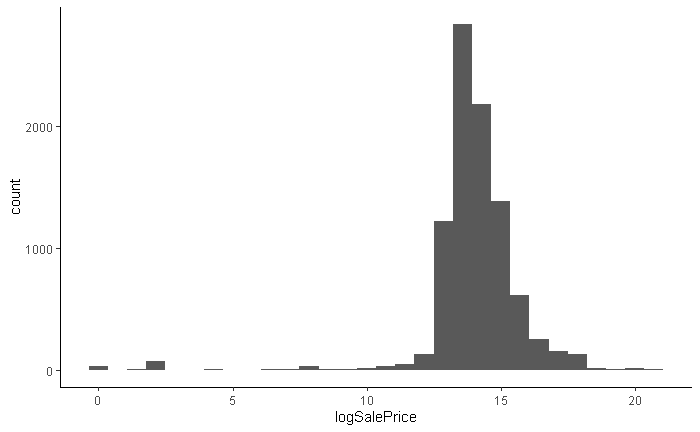

``` r
# histogram to visually confirm distribution finding of 2020 data
ggplot(housesM2019, aes(x = logSalePrice)) + geom_histogram()  
```

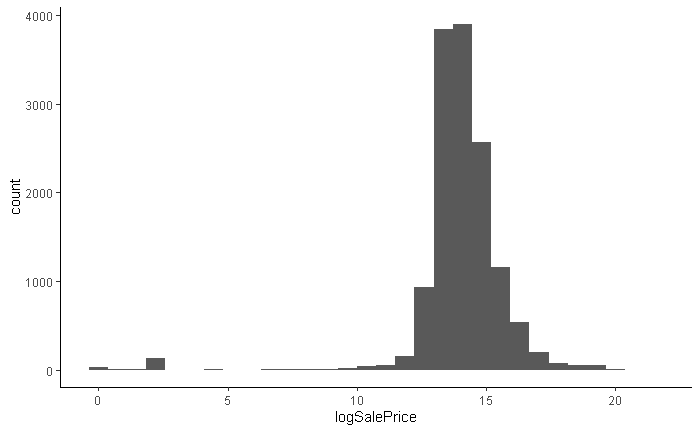

``` r
# T test to compare mean values of 2019 to 2020
t.test(housesM2019$SALE.PRICE, housesM2020$SALE.PRICE)
```

        Welch Two Sample t-test

    data:  housesM2019$SALE.PRICE and housesM2020$SALE.PRICE
    t = 0.64652, df = 22766, p-value = 0.518
    alternative hypothesis: true difference in means is not equal to 0
    95 percent confidence interval:
     -455800.4  904482.7
    sample estimates:
    mean of x mean of y 
      4631874   4407533 

## Q1.4.1

The results of Q1.3.1 demonstrate that there is a trend in Manhattan
real estate prices as a result of the COVID-19 pandemic. In truth, there
appears to be a clear decrease in both mean and median prices from an
observational perspective, which is in line with the hypothesis.
However, this trend is not statistically significant as P\>0.055. Thus,
the hypothesis cannot be proven for Manhattan real estate.

## Q1.3.2

Queen’s Statistical Test. The datasets will be processed by the summary
function to gather basic information on the distribution and gather
preliminary information on the validity of our hypothesis. That is, we
are doing a manual comparison of the data’s values to see if a decrease
in real estate prices exists. In order to support or disprove this
finding, we conduct a t-test after performing some preliminary steps to
ensure they both have Gaussian distribution. The t-test is ideal as they
are designed for numerical and categorical data to assess if there lies
a statistically significant difference between the two samples. We can
use the p value to determine the odds that we observe the difference
that we do assuming no difference at all.

``` r
# import Manhattan 2020 data
housesQ2020 = read.csv(file="2020_queens.csv", header = TRUE, na.string=c("", " "))

# import Manhattan 2019 data
housesQ2019 = read.csv(file="2019_queens.csv", header = TRUE, na.string=c("", " "))

# indicate headers
head(housesQ2020)
```

``` r
head(housesQ2019)
```

``` r
# check the basic statistics and distribution of the price in 2020
summary(housesQ2020$SALE.PRICE)
```

         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
            0         0    350000    694462    725000 369300000 

``` r
# check the basic statistics and distribution of the price in 2019
summary(housesQ2019$SALE.PRICE)
```

         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
            0         0    349000    753601    705000 337534524 

``` r
library(e1071)  

# check skewness of 2020 data
skewness(housesQ2020$SALE.PRICE)
```

    [1] 57.18534

``` r
# check skewness of 2019 data
skewness(housesQ2019$SALE.PRICE)
```

    [1] 44.16718

``` r
#data is heavily skewed
#need to transform to find out if distribution is normal

# remove 0 attributes for log transformation to work
# 0 means transfer of ownership and should be ommited in price prediction model
housesQ2020<-housesQ2020[!(housesQ2020$SALE.PRICE==0),]
housesQ2019<-housesQ2019[!(housesQ2019$SALE.PRICE==0),]

#apply log transform to get better sense of distribution 
housesQ2020$logSalePrice = log(housesQ2020$SALE.PRICE)
housesQ2019$logSalePrice = log(housesQ2019$SALE.PRICE)

# check skewness of transformed 2020 data
skewness(housesQ2020$logSalePrice)
```

    [1] -4.489889

``` r
# check skewness of transformed 2019 data
skewness(housesQ2019$logSalePrice)
```

    [1] -4.312476

``` r
# 2020 data is positively skewed with normal distribution
# 2019 data is positively skewed with normal distribution

library(ggplot2)
theme_set(theme_classic())

# histogram to visually confirm distribution finding of 2020 data
ggplot(housesQ2020, aes(x = logSalePrice)) + geom_histogram() 
```

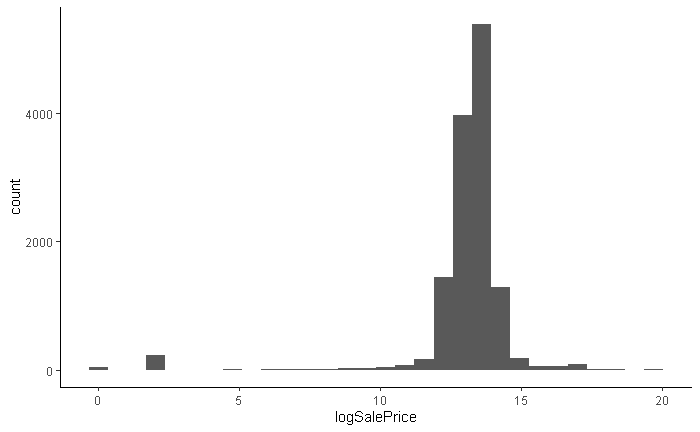

``` r
# histogram to visually confirm distribution finding of 2020 data
ggplot(housesQ2019, aes(x = logSalePrice)) + geom_histogram()  
```

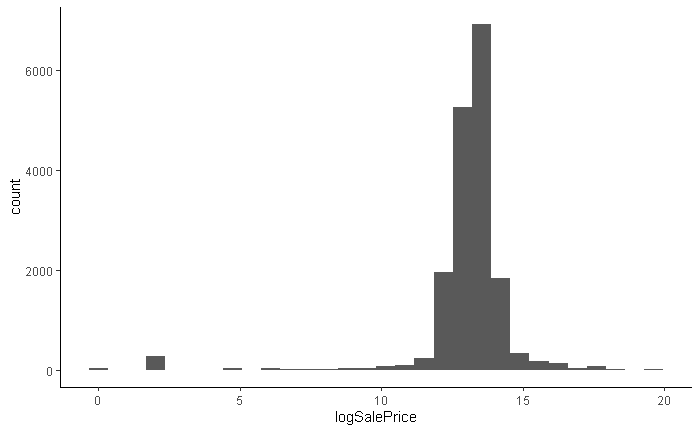

``` r
# T test to compare mean values of 2019 to 2020
t.test(housesQ2019$SALE.PRICE, housesQ2020$SALE.PRICE)
```

        Welch Two Sample t-test

    data:  housesQ2019$SALE.PRICE and housesQ2020$SALE.PRICE
    t = 0.77751, df = 29914, p-value = 0.4369
    alternative hypothesis: true difference in means is not equal to 0
    95 percent confidence interval:
     -90590.25 209715.89
    sample estimates:
    mean of x mean of y 
      1130722   1071159 

## Q1.4.2:

The results of Q1.3.2 demonstrate that there is a trend in Queen’s real
estate prices as a result of the COVID-19 pandemic. In truth, there
appears to be a clear decrease in the average price from an
observational perspective, which is not in line with the hypothesis.
There does appear to be more positive skewness as hypothesized, as there
is a greater demand volume for cheaper real estate. However, this trend
is not statistically significant as P\>0.055. Thus, the hypothesis
cannot be proven for Queen’s real estate.

# Q2: Feature Selection and Multicollinearity Analysis for Manhattan

``` r
#categorical or numerical?
str(housesM2020)
```

    'data.frame':   9211 obs. of  22 variables:
     $ ï..BOROUGH                    : int  1 1 1 1 1 1 1 1 1 1 ...
     $ NEIGHBORHOOD                  : chr  "ALPHABET CITY" "ALPHABET CITY" "ALPHABET CITY" "ALPHABET CITY" ...
     $ BUILDING.CLASS.CATEGORY       : chr  "03 THREE FAMILY DWELLINGS" "07 RENTALS - WALKUP APARTMENTS" "07 RENTALS - WALKUP APARTMENTS" "07 RENTALS - WALKUP APARTMENTS" ...
     $ TAX.CLASS.AT.PRESENT          : chr  "1" "2B" "2" "2" ...
     $ BLOCK                         : int  377 374 376 376 376 376 376 376 376 376 ...
     $ LOT                           : int  66 1 28 31 31 31 31 31 31 31 ...
     $ EASE.MENT                     : logi  NA NA NA NA NA NA ...
     $ BUILDING.CLASS.AT.PRESENT     : chr  "C0" "C7" "C4" "C4" ...
     $ ADDRESS                       : chr  "243 EAST 7TH STREET" "301-303 EAST 4TH STREET" "272 EAST 7TH STREET" "278 EAST 7TH STREET, 1B/2B" ...
     $ APARTMENT.NUMBER              : chr  NA NA NA NA ...
     $ ZIP.CODE                      : int  10009 10009 10009 10009 10009 10009 10009 10009 10009 10009 ...
     $ RESIDENTIAL.UNITS             : chr  "3" "8" "24" "19" ...
     $ COMMERCIAL.UNITS              : int  0 2 0 0 0 0 0 0 0 0 ...
     $ TOTAL.UNITS                   : chr  "3" "10" "24" "19" ...
     $ LAND.SQUARE.FEET              : chr  "2,381" "1,501" "2,764" "2,772" ...
     $ GROSS.SQUARE.FEET             : chr  "3,084" "6,929" "13,206" "13,248" ...
     $ YEAR.BUILT                    : int  1899 1900 1900 1920 1920 1920 1920 1920 1920 1920 ...
     $ TAX.CLASS.AT.TIME.OF.SALE     : int  1 2 2 2 2 2 2 2 2 2 ...
     $ BUILDING.CLASS.AT.TIME.OF.SALE: chr  "C0" "C7" "C4" "C4" ...
     $ SALE.PRICE                    : int  4350000 3672530 1 290000 2500 125375 2500 2500 2500 2500 ...
     $ SALE.DATE                     : chr  "2020-07-16" "2020-11-24" "2020-06-26" "2020-02-07" ...
     $ logSalePrice                  : num  15.29 15.12 0 12.58 7.82 ...

``` r
#missing values?
var.missing<- sapply(housesM2020,function(x)sum(is.na(x)))
var.missing<- var.missing[order(var.missing)]
var.missing
```

                        ï..BOROUGH                   NEIGHBORHOOD        BUILDING.CLASS.CATEGORY                          BLOCK 
                                 0                              0                              0                              0 
                               LOT                        ADDRESS                       ZIP.CODE      TAX.CLASS.AT.TIME.OF.SALE 
                                 0                              0                              0                              0 
    BUILDING.CLASS.AT.TIME.OF.SALE                     SALE.PRICE                      SALE.DATE                   logSalePrice 
                                 0                              0                              0                              0 
              TAX.CLASS.AT.PRESENT      BUILDING.CLASS.AT.PRESENT                     YEAR.BUILT                    TOTAL.UNITS 
                                 3                              3                            963                           4456 
                 RESIDENTIAL.UNITS               APARTMENT.NUMBER               COMMERCIAL.UNITS               LAND.SQUARE.FEET 
                              4779                           5142                           8190                           8513 
                 GROSS.SQUARE.FEET                      EASE.MENT 
                              8513                           9211 

We see that alot of attributes have NA values. This normally wouldn’t
pose an issue but alot of these likely contribute to the overall price.
In truth, building category, tax class at time of sale, sale date, year
built, total units and gross square feet are all of interest. However,
alot of these attributes have missing values (N/A instances). Thus, if
we were to take the subset of them that don’t have any missing values,
we’d only be representing a small subset of the data and our results may
not be of meaning. Thankfully, our answer from Q1 showed us that despite
there being an observational difference between 2019 and 2020 prices, it
is not statistically significant. Thus, we can append the 2019 records
to the 2020 records. The net result should be final subset of the two
that is of comparable size to the original 2020 data.

Due to technical limitations and literal hours of trying, this part was
done in excel. The 2019 and 2020 was appended to one another into a
single workbook.

Attributes deemed unimportant had their columns removed. Building Class
had it descriptive field removed, it is now only a numerical value. A
higher class number means a tendency towards more commercial and
multi-use buildings. Total Units was converted into a numeric value.
Gross Square Feet was converted into a numeric value. Tax Class at time
of sale had it’s descriptive field removed. Higher class number means
higher taxes. Sale Price was converted into a numeric. Sale Date was
converted into a numeric. ie, the higher the number (2020XYWZ) the more
recent the sale compared to (2019ABCD).

Sub 10,000 or over 10,000,000 sales prices were also removed as they
represent a transfer of ownership or likely extremes that skew our
results. Any records with one or more null attributes were removed. The
result is the following.

``` r
# import Manhattan data
housesM = read.csv(file="FINAL_manhattan4.csv", header = TRUE, na.string=c("", " "))

#determine which values are skewed and need a transform
skewness(housesM$ï..TOTAL.UNITS)
```

    [1] 4.901844

``` r
skewness(housesM$GROSS.SQUARE.FEET)
```

    [1] 14.42251

``` r
skewness(housesM$YEAR.BUILT)
```

    [1] 2.267622

``` r
skewness(housesM$TAX.CLASS.AT.TIME.OF.SALE)
```

    [1] 1.021522

``` r
skewness(housesM$SALE.DATE )
```

    [1] 0.3325903

``` r
skewness(housesM$BUILDING.CLASS)
```

    [1] 1.602546

``` r
skewness(housesM$SALE.PRICE)
```

    [1] 0.4018971

``` r
#total units, square feet and year built need to transformed
housesM$logUnits = log(housesM$ï..TOTAL.UNITS)
housesM$logYearBuilt = log(housesM$YEAR.BUILT)
housesM$logSquareFeet = log(housesM$GROSS.SQUARE.FEET)


str(housesM)
```

    'data.frame':   1013 obs. of  10 variables:
     $ ï..TOTAL.UNITS           : int  3 10 19 19 28 20 9 9 24 14 ...
     $ GROSS.SQUARE.FEET        : int  3084 6929 13248 13248 18254 9750 6055 6000 15460 6825 ...
     $ YEAR.BUILT               : int  1899 1900 1920 1920 1900 1900 1900 1900 1890 1920 ...
     $ TAX.CLASS.AT.TIME.OF.SALE: int  1 2 2 2 2 2 2 2 2 2 ...
     $ SALE.DATE                : int  200716 201124 200207 200313 200206 200603 200616 200616 200616 200824 ...
     $ BUILDING.CLASS           : int  3 7 7 7 7 7 7 7 7 7 ...
     $ SALE.PRICE               : int  4350000 3672530 290000 125375 585000 249508 1250000 1250000 2500000 3950000 ...
     $ logUnits                 : num  1.1 2.3 2.94 2.94 3.33 ...
     $ logYearBuilt             : num  7.55 7.55 7.56 7.56 7.55 ...
     $ logSquareFeet            : num  8.03 8.84 9.49 9.49 9.81 ...

Checking Correlation

``` r
# scatter plot
p <- plot(housesM$logUnits, housesM$SALE.PRICE, xlab = "Number of Units", ylab = "House Price")
```

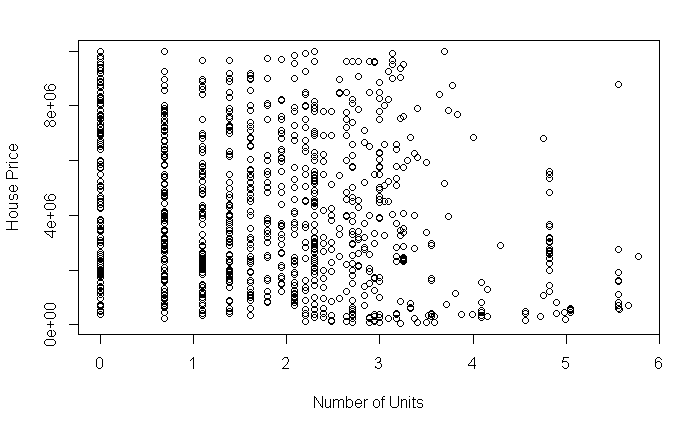

``` r
p1 <- plot(housesM$logSquareFeet, housesM$SALE.PRICE, xlab = "Gross Square Feet", ylab = "House Price")
```

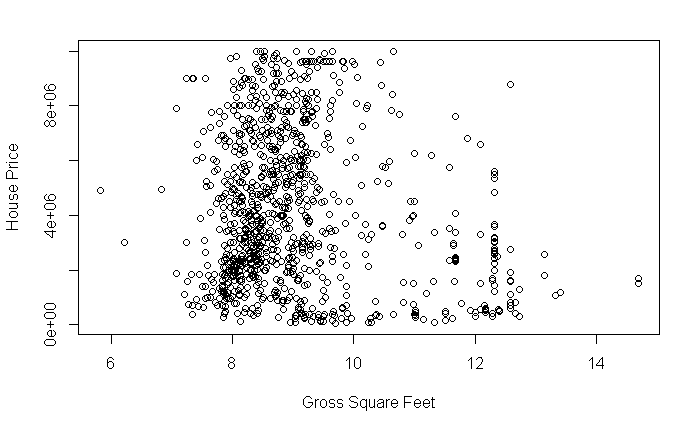

``` r
p2 <- plot(housesM$logYearBuilt, housesM$SALE.PRICE, xlab = "Year Built", ylab = "House Price")
```

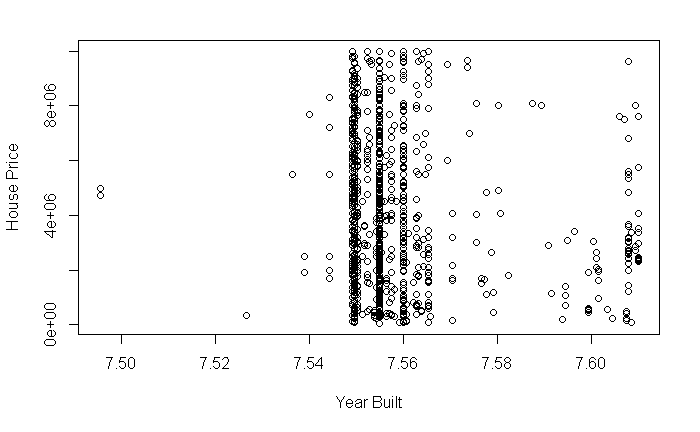

``` r
p3 <- plot(housesM$TAX.CLASS.AT.TIME.OF.SALE, housesM$SALE.PRICE, xlab = "Tax Class", ylab = "House Price")
```

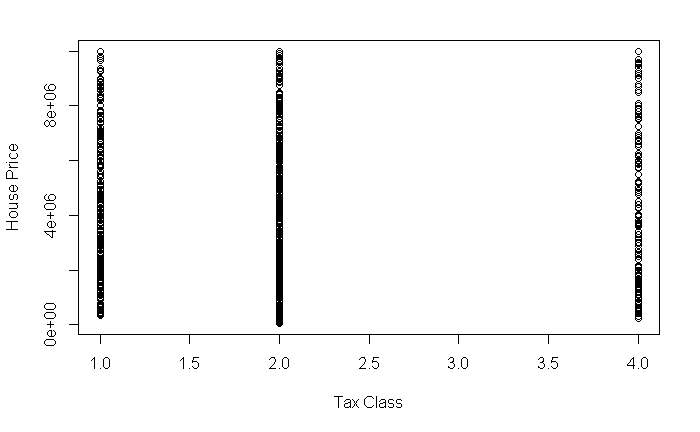

``` r
p4 <- plot(housesM$SALE.DATE, housesM$SALE.PRICE, xlab = "Sale Date", ylab = "House Price")
```

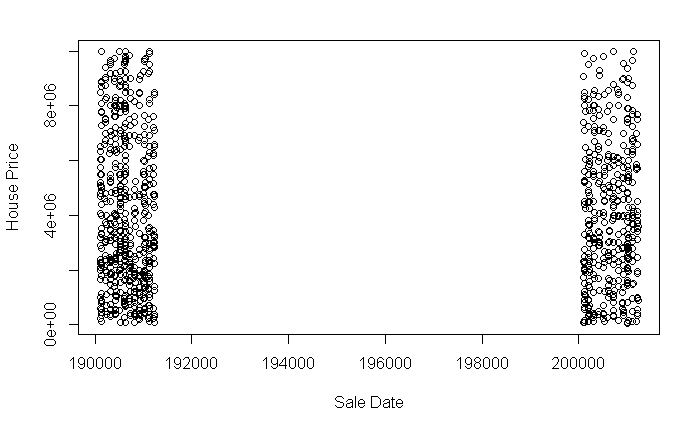

``` r
p5 <- plot(housesM$BUILDING.CLASS , housesM$SALE.PRICE, xlab = "Building Class", ylab = "House Price")
```

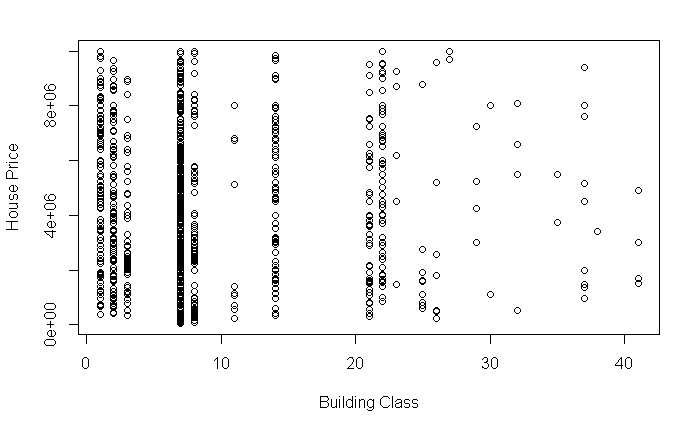

As illustrated, the results are mixed. The number of units doesn’t have
a noticeable trend line but appears as though higher priced homes have a
lower number of units. This could be that this group represents the more
luxurious penthouse estates. Similar findings were discovered for the
gross square feet metric. Properties with lots of area (likely
industrial) and very little area (likely low income) do not sell for as
much. The year of construction demonstrates that newer houses and
relatively extremly historic houses do not sell as much as their
counterparts. The tax class doesn’t seem to affect the price. As per the
NYC finance department, this implies that residential properties can
sell for as much as corporately owned properties. Sell date is
subdivided into two sub categories, 2019 and 2020 data. Although there
doesn’t appear to be a trend between the time of year and selling price
of a house. A claim that is further supported by the previous finding of
there being no statistically significant difference among them. Finally
low building classes seem to sell for more. These are categorized mostly
residential units over commercial ones. Thus, there seems to be a trend
that residential units sell for more.

``` r
# check multicolinearity
library(dplyr)

dataM <- dplyr::select(housesM, SALE.PRICE, ï..TOTAL.UNITS, logSquareFeet, logYearBuilt, TAX.CLASS.AT.TIME.OF.SALE, SALE.DATE, BUILDING.CLASS)

cormat<-signif(cor(dataM),2)
cormat
```

                              SALE.PRICE ï..TOTAL.UNITS logSquareFeet logYearBuilt TAX.CLASS.AT.TIME.OF.SALE SALE.DATE BUILDING.CLASS
    SALE.PRICE                    1.0000        -0.1900        -0.150       -0.140                    0.0053   -0.0380          0.015
    ï..TOTAL.UNITS               -0.1900         1.0000         0.670        0.410                    0.1900   -0.0099          0.150
    logSquareFeet                -0.1500         0.6700         1.000        0.490                    0.4000    0.0120          0.330
    logYearBuilt                 -0.1400         0.4100         0.490        1.000                    0.1200   -0.0440          0.130
    TAX.CLASS.AT.TIME.OF.SALE     0.0053         0.1900         0.400        0.120                    1.0000    0.0270          0.930
    SALE.DATE                    -0.0380        -0.0099         0.012       -0.044                    0.0270    1.0000          0.024
    BUILDING.CLASS                0.0150         0.1500         0.330        0.130                    0.9300    0.0240          1.000

There appears to be no clear correlation between any of the attributes
as none of the factors are greater than 0.9. On the exception of the
Building Class and Tax Class at time of sale. We will keep them for this
analysis as we only care about prediction. It should be noted that many
of the attributes are negatively correlated which implies that their
value decreases in proportion to others increasing.

Splitting the data into testing and training sets is shown below.

``` r
# splitting the data into testing and training sets 
require(caTools)
set.seed(123)
sample = sample.split(housesM, SplitRatio = 0.9)

trainM = subset(housesM, sample == TRUE)
testM = subset(housesM, sample == FALSE)
```

# Q2: Feature Selection and Multicollinearity Analysis for Queen’s

NOTE: this analysis was done at a later date is slightly more concrete

``` r
#categorical or numerical?
str(housesQ2020)
```

    'data.frame':   13198 obs. of  22 variables:
     $ ï..BOROUGH                    : int  4 4 4 4 4 4 4 4 4 4 ...
     $ NEIGHBORHOOD                  : chr  "AIRPORT JFK" "AIRPORT LA GUARDIA" "AIRPORT LA GUARDIA" "ARVERNE" ...
     $ BUILDING.CLASS.CATEGORY       : chr  "39 TRANSPORTATION FACILITIES" "01 ONE FAMILY DWELLINGS" "12 CONDOS - WALKUP APARTMENTS" "01 ONE FAMILY DWELLINGS" ...
     $ TAX.CLASS.AT.PRESENT          : chr  "4" "1" "2" "1" ...
     $ BLOCK                         : int  14260 949 949 15830 15830 15831 15835 15838 15849 15966 ...
     $ LOT                           : int  80 41 1003 20 27 27 59 45 22 5 ...
     $ EASE.MENT                     : logi  NA NA NA NA NA NA ...
     $ BUILDING.CLASS.AT.PRESENT     : chr  "V7" "A5" "R2" "A5" ...
     $ ADDRESS                       : chr  "N/A ROCKAWAY BLVD" "19-62 81ST STREET" "19-37 80TH STREET, 1" "3-20 BEACH 41 STREET" ...
     $ APARTMENT.NUMBER              : chr  NA NA "1" NA ...
     $ ZIP.CODE                      : int  11434 11370 11370 11691 11691 11691 11691 11691 11691 11691 ...
     $ RESIDENTIAL.UNITS             : int  0 1 1 1 1 1 1 1 1 1 ...
     $ COMMERCIAL.UNITS              : int  0 0 NA 0 0 0 0 0 0 0 ...
     $ TOTAL.UNITS                   : int  0 1 1 1 1 1 1 1 1 1 ...
     $ LAND.SQUARE.FEET              : chr  "268,092" "1,800" NA "2,469" ...
     $ GROSS.SQUARE.FEET             : chr  "0" "1,224" NA "1,476" ...
     $ YEAR.BUILT                    : int  NA 1945 NA 2005 2005 2006 1920 1920 1920 2018 ...
     $ TAX.CLASS.AT.TIME.OF.SALE     : int  4 1 2 1 1 1 1 1 1 1 ...
     $ BUILDING.CLASS.AT.TIME.OF.SALE: chr  "T1" "A5" "R2" "A5" ...
     $ SALE.PRICE                    : int  4121000 584569 420000 300000 360000 465000 540000 565000 190000 504972 ...
     $ SALE.DATE                     : chr  "2020-07-16" "2020-08-28" "2020-03-12" "2020-12-16" ...
     $ logSalePrice                  : num  15.2 13.3 12.9 12.6 12.8 ...

``` r
#missing values?
var.missing<- sapply(housesQ2020,function(x)sum(is.na(x)))
var.missing<- var.missing[order(var.missing)]
var.missing
```

                        ï..BOROUGH                   NEIGHBORHOOD        BUILDING.CLASS.CATEGORY           TAX.CLASS.AT.PRESENT 
                                 0                              0                              0                              0 
                             BLOCK                            LOT      BUILDING.CLASS.AT.PRESENT                        ADDRESS 
                                 0                              0                              0                              0 
                          ZIP.CODE      TAX.CLASS.AT.TIME.OF.SALE BUILDING.CLASS.AT.TIME.OF.SALE                     SALE.PRICE 
                                 0                              0                              0                              0 
                         SALE.DATE                   logSalePrice                     YEAR.BUILT                    TOTAL.UNITS 
                                 0                              0                            527                           2997 
                 RESIDENTIAL.UNITS               COMMERCIAL.UNITS               LAND.SQUARE.FEET              GROSS.SQUARE.FEET 
                              3379                           4667                           5049                           5049 
                  APARTMENT.NUMBER                      EASE.MENT 
                             11159                          13198 

We see that alot of attributes have NA values. This normally wouldn’t
pose an issue but alot of these likely contribute to the overall price.
In truth, building category, tax class at time of sale, sale date, year
built, total units, block, LOT, gross square feet and land square feet
are all of interest. The remainig numerical attributes are derived from
these. For example, residential units is derived from total units.
However, alot of these attributes have missing values (N/A instances).
Thus, if we were to take the subset of them that don’t have any missing
values, we’d only be representing a small subset of the data and our
results may not be of meaning. Thankfully, our answer from Q1 showed us
that despite there being an observational difference between 2019 and
2020 prices, it is not statistically significant. Thus, we can append
the 2019 records to the 2020 records. The net result should be final
subset of the two that is of comparable size to the original 2020 data.

Due to technical limitations and literal hours of trying, this part was
done in excel. The 2019 and 2020 was appended to one another into a
single workbook.

Certain attributes were manipulated in excel to be better handled.

Building Class had it descriptive field removed, it is now only a
numerical value. A higher class number means a tendency towards more
commercial and multi-use buildings. Total Units was converted into a
numeric value and all 0 records removed. Gross Square Feet was converted
into a numeric value and all 0 records removed. Land Square Feet was
converted into a numeric value and all 0 records removed. Tax Class at
time of sale had it’s descriptive field removed. A higher class number
means higher tax rate. Sale Price was converted into a numeric. Sale
Date was converted into a numeric. The higher the ale date number
(MMDD), the later the sale happened in the year. 2020 and 2019 are
interchangeable here as we did not observe any statically significant
differences them, but this allows us to analyze differences within
them.That is to say, the sale date was converted into a value that would
only reflect the seasonal change in house price, as we concluded that
annual differences between 2019 and 2020 aren’t significant. LOT and
block were converted to numeric values.

Sub 10,000 or over 10,000,000 sales prices were also removed as they
represent a transfer of ownership or likely extremes that skew our
results. A similar process was done to extreme outliers on the square
foot attributes The result is the following.

``` r
# import Queen's data
housesQ = read.csv(file="FINAL_queens2.csv", header = TRUE, na.string=c("", " "))


#determine which values are skewed and need a transform
skewness(housesQ$TOTAL.UNITS)
```

    [1] 17.23887

``` r
skewness(housesQ$GROSS.SQUARE.FEET)
```

    [1] 12.33265

``` r
skewness(housesQ$LAND.SQUARE.FEET)
```

    [1] 25.40579

``` r
skewness(housesQ$BLOCK)
```

    [1] -0.1946031

``` r
skewness(housesQ$LOT)
```

    [1] 9.661021

``` r
skewness(housesQ$YEAR.BUILT)
```

    [1] 1.37396

``` r
skewness(housesQ$TAX.CLASS.AT.TIME.OF.SALE)
```

    [1] 4.730846

``` r
skewness(housesQ$SALE.DATE)
```

    [1] -0.0799623

``` r
skewness(housesQ$BUILDING.CLASS)
```

    [1] 5.073629

``` r
skewness(housesQ$SALE.PRICE)
```

    [1] 6.019655

``` r
#total units, square feet and year built need to transformed
housesQ$logUnits = log(housesQ$TOTAL.UNITS)
housesQ$logGsFeet = log(housesQ$GROSS.SQUARE.FEET)
housesQ$logLsFeet = log(housesQ$LAND.SQUARE.FEET)
housesQ$logLot = log(housesQ$LOT)
housesQ$logClass = log(housesQ$BUILDING.CLASS)
```

Analyzing the scatter plots to get a sense of which attributes may
contribute more.

``` r
#scatter plot
p <- plot(housesQ$logUnits, housesQ$SALE.PRICE, xlab = "Number of Units", ylab = "House Price")
```

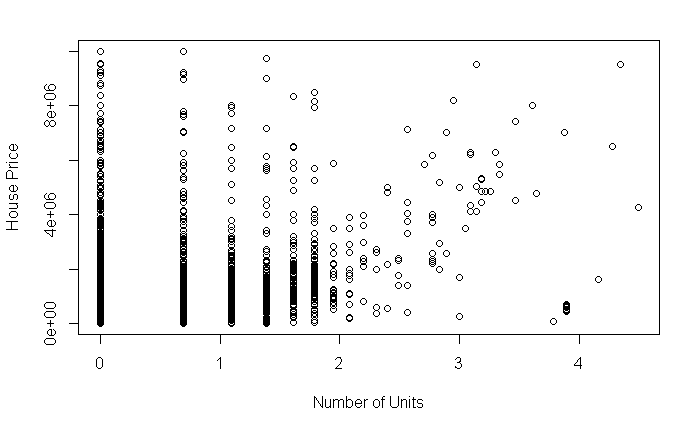

``` r
p1 <- plot(housesQ$logGsFeet, housesQ$SALE.PRICE, xlab = "Gross Square Feet", ylab = "House Price")
```

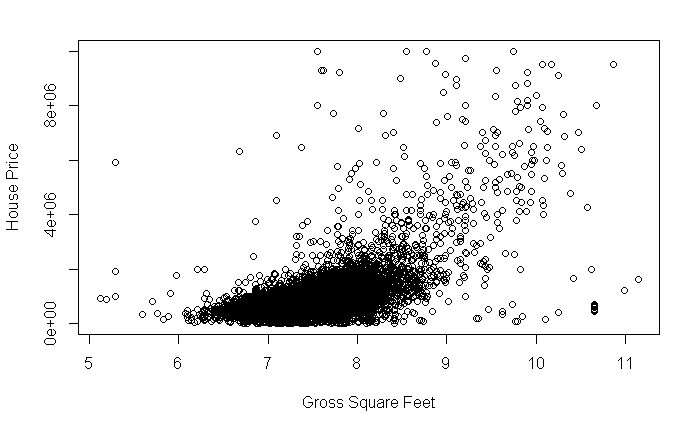

``` r
p2 <- plot(housesQ$logLsFeet, housesQ$SALE.PRICE, xlab = "Land Square Feet", ylab = "House Price")
```

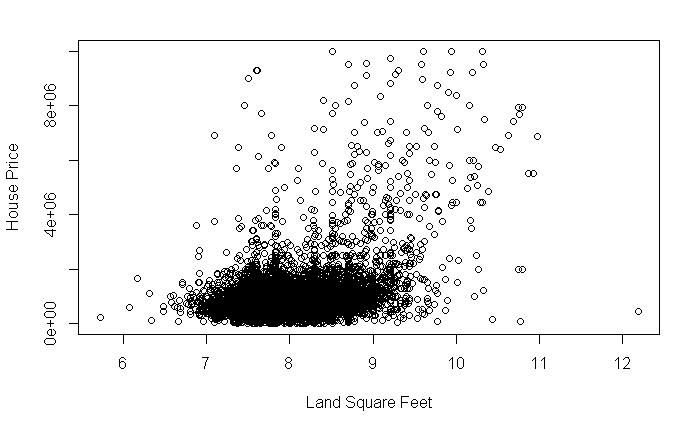

``` r
p3 <- plot(housesQ$logLot, housesQ$SALE.PRICE, xlab = "Lot Number", ylab = "House Price")
```

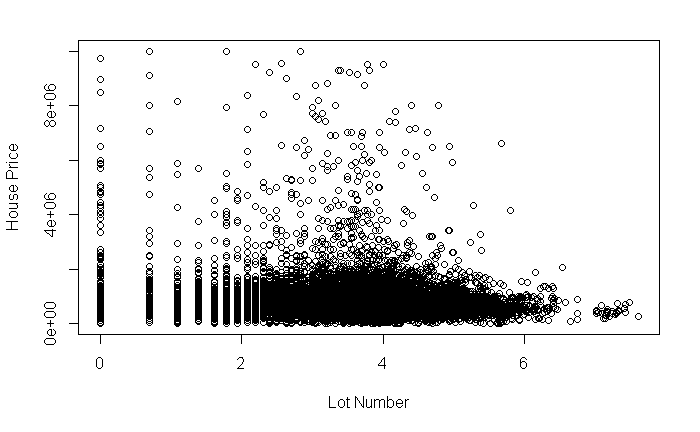

``` r
p4 <- plot(housesQ$logClass, housesQ$SALE.PRICE, xlab = "Building Class", ylab = "House Price")
```

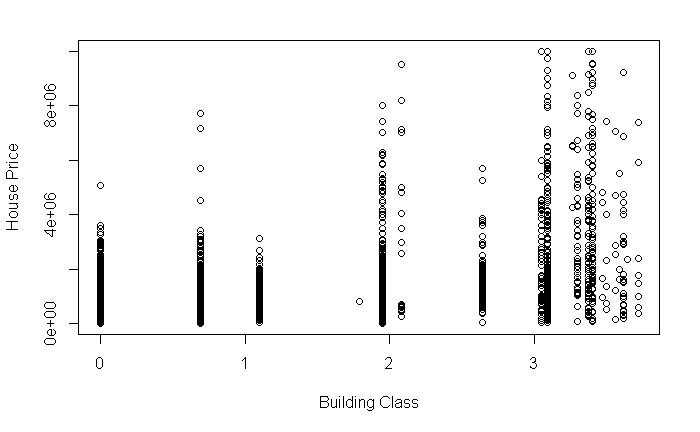

``` r
p5 <- plot(housesQ$BLOCK, housesQ$SALE.PRICE, xlab = "Block Number", ylab = "House Price")
```

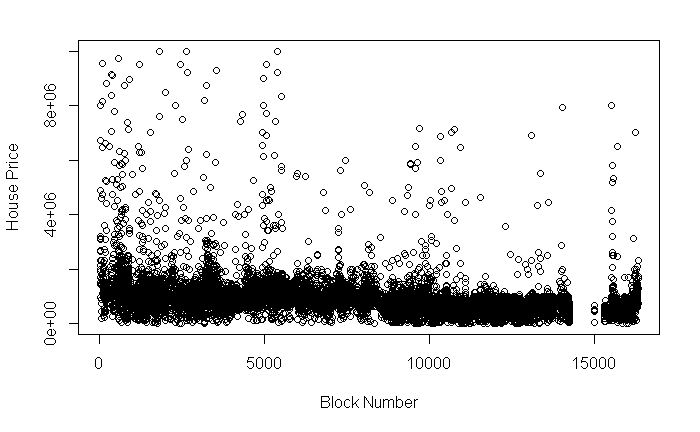

``` r
p6 <- plot(housesQ$YEAR.BUILT, housesQ$SALE.PRICE, xlab = "Year Built", ylab = "House Price")
```

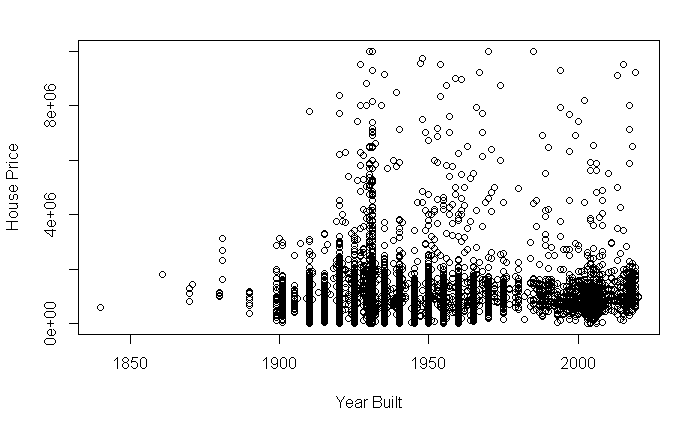

``` r
p7 <- plot(housesQ$TAX.CLASS.AT.TIME.OF.SALE, housesQ$SALE.PRICE, xlab = "Tax Class", ylab = "House Price")
```

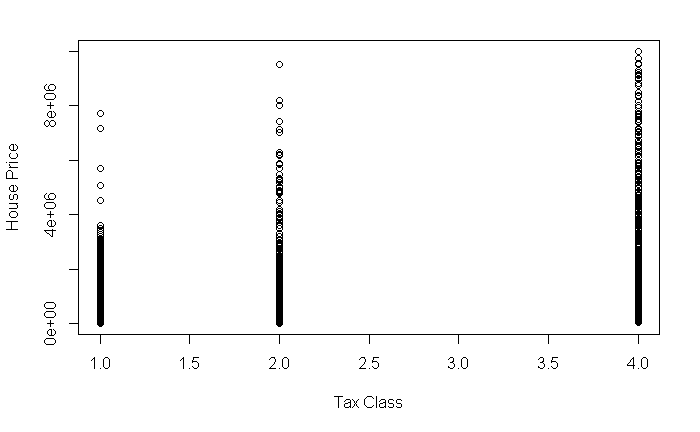

``` r
p8 <- plot(housesQ$SALE.DATE, housesQ$SALE.PRICE, xlab = "Sell Date", ylab = "House Price")
```

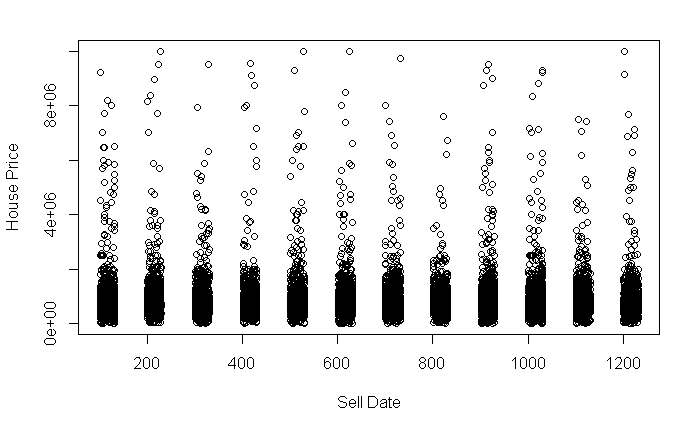

There appear to a few trends in the data, as derived from the scatter
plots. Estates between 2-3 units appear to sell for the mean of the
market. Higher gross square feet estates appear to sell for more.
Likewise, low land square feet seems to sell for less. Higher lot
numbers appear to sell for less. Higher building classes appear to sell
for more. There were no visible trends on the impact of block number,
perhaps that lower numbers can sell for more. Newer construction dates
are more likely to sell for less than mid 1900 estates. Higher tax
classes can sell for more money. No observable trends could be seen in
the sale date.

Checking the correlation between attributes.

``` r
# check multicolinearity
library(dplyr)

dataQ <- dplyr::select(housesQ, SALE.PRICE, logUnits, logGsFeet, logLsFeet, logLot, logClass, BLOCK, YEAR.BUILT, TAX.CLASS.AT.TIME.OF.SALE, SALE.DATE)

cormat<-signif(cor(dataQ),2)
cormat
```

                              SALE.PRICE logUnits logGsFeet logLsFeet  logLot logClass   BLOCK YEAR.BUILT TAX.CLASS.AT.TIME.OF.SALE SALE.DATE
    SALE.PRICE                      1.00    0.290     0.580    0.3300 -0.0900    0.520 -0.3400     0.1500                     0.530   -0.0100
    logUnits                        0.29    1.000     0.610   -0.0500 -0.0610    0.660 -0.2000     0.1400                     0.210   -0.0140
    logGsFeet                       0.58    0.610     1.000    0.3200 -0.0840    0.630 -0.2300     0.2500                     0.450   -0.0130
    logLsFeet                       0.33   -0.050     0.320    1.0000 -0.0560    0.100  0.1800     0.1200                     0.200    0.0023
    logLot                         -0.09   -0.061    -0.084   -0.0560  1.0000   -0.090  0.0640     0.0230                    -0.083    0.0038
    logClass                        0.52    0.660     0.630    0.1000 -0.0900    1.000 -0.2100     0.1500                     0.820   -0.0240
    BLOCK                          -0.34   -0.200    -0.230    0.1800  0.0640   -0.210  1.0000     0.0600                    -0.130   -0.0081
    YEAR.BUILT                      0.15    0.140     0.250    0.1200  0.0230    0.150  0.0600     1.0000                     0.088   -0.0075
    TAX.CLASS.AT.TIME.OF.SALE       0.53    0.210     0.450    0.2000 -0.0830    0.820 -0.1300     0.0880                     1.000   -0.0210
    SALE.DATE                      -0.01   -0.014    -0.013    0.0023  0.0038   -0.024 -0.0081    -0.0075                    -0.021    1.0000

There appears to be no clear correlation between any of the attributes
as none of the factors are greater than 0.9. It should be noted that
many of the attributes are negatively correlated which implies that
their value decreases in proportion to others increasing.

Splitting the data into testing and training sets is shown below.

``` r
# splitting the data into testing and training sets 
require(caTools)
set.seed(123)
sample = sample.split(housesQ, SplitRatio = 0.9)

trainQ = subset(housesQ, sample == TRUE)
testQ = subset(housesQ, sample == FALSE)
```

# Q.3.1: Create Manhattan Models

``` r
mModel <- lm(SALE.PRICE ~ ï..TOTAL.UNITS + logSquareFeet + logYearBuilt + TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE + BUILDING.CLASS, data=housesM)
summary(mModel)
```

    Call:
    lm(formula = SALE.PRICE ~ ï..TOTAL.UNITS + logSquareFeet + logYearBuilt + 
        TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE + BUILDING.CLASS, data = housesM)

    Residuals:
         Min       1Q   Median       3Q      Max 
    -4577223 -2246019  -381005  2071883  7375868 

    Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
    (Intercept)                1.093e+08  5.168e+07   2.115 0.034715 *  
    ï..TOTAL.UNITS            -1.061e+04  3.213e+03  -3.303 0.000992 ***
    logSquareFeet             -9.073e+04  1.083e+05  -0.838 0.402284    
    logYearBuilt              -1.317e+07  6.836e+06  -1.926 0.054372 .  
    TAX.CLASS.AT.TIME.OF.SALE  3.841e+04  2.602e+05   0.148 0.882687    
    SALE.DATE                 -2.453e+01  1.737e+01  -1.412 0.158196    
    BUILDING.CLASS             1.710e+04  3.104e+04   0.551 0.581754    
    ---
    Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    Residual standard error: 2728000 on 1006 degrees of freedom
    Multiple R-squared:  0.04384,   Adjusted R-squared:  0.03814 
    F-statistic: 7.687 on 6 and 1006 DF,  p-value: 4.298e-08

Using the total house data as a prediction sample, we see that alot of
the attributes have statistically significant P values and negative
coefficient estimates. Moreover, we see that the R squared metric is
quite low. Thus, we will use the AIC model to only select the most
predictive features in our final model.

## Q.3.1.1: Manhattan Model Selection

``` r
library(MASS)
step <- stepAIC(mModel, direction="both")
```

    Start:  AIC=30030.73
    SALE.PRICE ~ ï..TOTAL.UNITS + logSquareFeet + logYearBuilt + 
        TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE + BUILDING.CLASS

                                Df  Sum of Sq        RSS   AIC
    - TAX.CLASS.AT.TIME.OF.SALE  1 1.6218e+11 7.4890e+15 30029
    - BUILDING.CLASS             1 2.2601e+12 7.4911e+15 30029
    - logSquareFeet              1 5.2264e+12 7.4941e+15 30029
    <none>                                    7.4889e+15 30031
    - SALE.DATE                  1 1.4846e+13 7.5037e+15 30031
    - logYearBuilt               1 2.7617e+13 7.5165e+15 30033
    - ï..TOTAL.UNITS             1 8.1196e+13 7.5701e+15 30040

    Step:  AIC=30028.75
    SALE.PRICE ~ ï..TOTAL.UNITS + logSquareFeet + logYearBuilt + 
        SALE.DATE + BUILDING.CLASS

                                Df  Sum of Sq        RSS   AIC
    - logSquareFeet              1 5.1148e+12 7.4941e+15 30027
    <none>                                    7.4890e+15 30029
    - SALE.DATE                  1 1.4846e+13 7.5039e+15 30029
    - BUILDING.CLASS             1 2.3843e+13 7.5129e+15 30030
    - logYearBuilt               1 2.9214e+13 7.5182e+15 30031
    + TAX.CLASS.AT.TIME.OF.SALE  1 1.6218e+11 7.4889e+15 30031
    - ï..TOTAL.UNITS             1 8.1452e+13 7.5705e+15 30038

    Step:  AIC=30027.44
    SALE.PRICE ~ ï..TOTAL.UNITS + logYearBuilt + SALE.DATE + BUILDING.CLASS

                                Df  Sum of Sq        RSS   AIC
    <none>                                    7.4941e+15 30027
    - SALE.DATE                  1 1.5474e+13 7.5096e+15 30028
    - BUILDING.CLASS             1 1.9349e+13 7.5135e+15 30028
    + logSquareFeet              1 5.1148e+12 7.4890e+15 30029
    + TAX.CLASS.AT.TIME.OF.SALE  1 5.0539e+10 7.4941e+15 30029
    - logYearBuilt               1 4.1645e+13 7.5358e+15 30031
    - ï..TOTAL.UNITS             1 1.6665e+14 7.6608e+15 30048

``` r
step$anova 
```

    Stepwise Model Path 
    Analysis of Deviance Table

    Initial Model:
    SALE.PRICE ~ ï..TOTAL.UNITS + logSquareFeet + logYearBuilt + 
        TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE + BUILDING.CLASS

    Final Model:
    SALE.PRICE ~ ï..TOTAL.UNITS + logYearBuilt + SALE.DATE + BUILDING.CLASS

                             Step Df     Deviance Resid. Df   Resid. Dev      AIC
    1                                                  1006 7.488860e+15 30030.73
    2 - TAX.CLASS.AT.TIME.OF.SALE  1 1.621806e+11      1007 7.489023e+15 30028.75
    3             - logSquareFeet  1 5.114799e+12      1008 7.494137e+15 30027.44

As shown, the AIC model removed a relatively large amount of attributes.
This implies that the most accurate model constitutes all of the
selected attributes except square footage and property tax class.

## Q.3.2.2: Manhattan Performance Analysis

``` r
mModelTrain <- lm(SALE.PRICE ~ ï..TOTAL.UNITS + logSquareFeet + logYearBuilt + TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE + BUILDING.CLASS, data=trainM)
summary(mModelTrain)
```

    Call:
    lm(formula = SALE.PRICE ~ ï..TOTAL.UNITS + logSquareFeet + logYearBuilt + 
        TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE + BUILDING.CLASS, data = trainM)

    Residuals:
         Min       1Q   Median       3Q      Max 
    -4482785 -2281987  -398517  2059124  7193725 

    Coefficients:
                                Estimate Std. Error t value Pr(>|t|)   
    (Intercept)                1.247e+08  5.481e+07   2.275  0.02312 * 
    ï..TOTAL.UNITS            -1.049e+04  3.344e+03  -3.137  0.00176 **
    logSquareFeet             -5.412e+04  1.177e+05  -0.460  0.64580   
    logYearBuilt              -1.523e+07  7.253e+06  -2.100  0.03599 * 
    TAX.CLASS.AT.TIME.OF.SALE  2.111e+04  2.803e+05   0.075  0.93997   
    SALE.DATE                 -2.546e+01  1.839e+01  -1.384  0.16671   
    BUILDING.CLASS             2.212e+04  3.356e+04   0.659  0.51003   
    ---
    Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    Residual standard error: 2742000 on 905 degrees of freedom
    Multiple R-squared:  0.04339,   Adjusted R-squared:  0.03705 
    F-statistic: 6.841 on 6 and 905 DF,  p-value: 4.1e-07

``` r
mModelTest <- lm(SALE.PRICE ~ ï..TOTAL.UNITS + logYearBuilt + SALE.DATE + BUILDING.CLASS, data=testM)
summary(mModelTest)
```

    Call:
    lm(formula = SALE.PRICE ~ ï..TOTAL.UNITS + logYearBuilt + SALE.DATE + 
        BUILDING.CLASS, data = testM)

    Residuals:
         Min       1Q   Median       3Q      Max 
    -4499778 -2043466  -621066  1956536  5987816 

    Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
    (Intercept)    -9.135e+07  1.576e+08  -0.580  0.56358   
    ï..TOTAL.UNITS -3.972e+04  1.354e+04  -2.934  0.00419 **
    logYearBuilt    1.314e+07  2.076e+07   0.633  0.52837   
    SALE.DATE      -1.476e+01  5.308e+01  -0.278  0.78157   
    BUILDING.CLASS -3.024e+04  3.258e+04  -0.928  0.35559   
    ---
    Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    Residual standard error: 2593000 on 96 degrees of freedom
    Multiple R-squared:  0.09828,   Adjusted R-squared:  0.06071 
    F-statistic: 2.616 on 4 and 96 DF,  p-value: 0.03987

Looking at the final model’s performance on the testing and training
data subsets, we see that the accuracy hasn’t improved much from prior
steps. The adjusted R squared metric is poorly low, even more so than
the Queen’s model. That being said, the testing set likely provided a
marginally higher accuracy as it had more records to assess.

The issues in poor predictive accuracy can be attributed to a
combination of improper data analysis and a dataset that was messy and
difficult to interpret.

# Q.3.2: Create Queen’s Models

``` r
qModel <- lm(SALE.PRICE ~ logUnits +logGsFeet + logLsFeet + logLot + logClass + BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE, data=housesQ)
summary(qModel)
```

    Call:
    lm(formula = SALE.PRICE ~ logUnits + logGsFeet + logLsFeet + 
        logLot + logClass + BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE + 
        SALE.DATE, data = housesQ)

    Residuals:
         Min       1Q   Median       3Q      Max 
    -4201185  -151305     2440   140089  7502813 

    Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
    (Intercept)               -7.543e+06  3.107e+05 -24.274  < 2e-16 ***
    logUnits                   2.677e+04  1.795e+04   1.491 0.135942    
    logGsFeet                  4.773e+05  1.236e+04  38.627  < 2e-16 ***
    logLsFeet                  3.350e+05  9.813e+03  34.137  < 2e-16 ***
    logLot                    -7.161e+03  3.406e+03  -2.103 0.035519 *  
    logClass                  -7.384e+04  2.001e+04  -3.690 0.000225 ***
    BLOCK                     -4.351e+01  9.254e-01 -47.023  < 2e-16 ***
    YEAR.BUILT                 1.054e+03  1.632e+02   6.458 1.09e-10 ***
    TAX.CLASS.AT.TIME.OF.SALE  4.625e+05  1.989e+04  23.258  < 2e-16 ***
    SALE.DATE                 -4.718e+00  1.062e+01  -0.444 0.657032    
    ---
    Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    Residual standard error: 492500 on 17684 degrees of freedom
    Multiple R-squared:  0.5082,    Adjusted R-squared:  0.508 
    F-statistic:  2031 on 9 and 17684 DF,  p-value: < 2.2e-16

Using the total house data as a prediction sample, we see that alot of
the attributes have statistically significant P values and negative
coefficient estimates. Moreover, we see that the R squared metric is
quite low. Thus, we will use the AIC model to only select the most
predictive features in our final model.

## Q.3.2.1: Queen’s Model Selection

``` r
library(MASS)
step <- stepAIC(qModel, direction="both")
```

    Start:  AIC=463852.5
    SALE.PRICE ~ logUnits + logGsFeet + logLsFeet + logLot + logClass + 
        BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE

                                Df  Sum of Sq        RSS    AIC
    - SALE.DATE                  1 4.7830e+10 4.2902e+15 463851
    <none>                                    4.2901e+15 463853
    - logUnits                   1 5.3942e+11 4.2907e+15 463853
    - logLot                     1 1.0725e+12 4.2912e+15 463855
    - logClass                   1 3.3025e+12 4.2934e+15 463864
    - YEAR.BUILT                 1 1.0119e+13 4.3003e+15 463892
    - TAX.CLASS.AT.TIME.OF.SALE  1 1.3123e+14 4.4214e+15 464384
    - logLsFeet                  1 2.8272e+14 4.5729e+15 464980
    - logGsFeet                  1 3.6198e+14 4.6521e+15 465284
    - BLOCK                      1 5.3644e+14 4.8266e+15 465935

    Step:  AIC=463850.7
    SALE.PRICE ~ logUnits + logGsFeet + logLsFeet + logLot + logClass + 
        BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE

                                Df  Sum of Sq        RSS    AIC
    <none>                                    4.2902e+15 463851
    - logUnits                   1 5.3940e+11 4.2907e+15 463851
    + SALE.DATE                  1 4.7830e+10 4.2901e+15 463853
    - logLot                     1 1.0737e+12 4.2913e+15 463853
    - logClass                   1 3.2983e+12 4.2935e+15 463862
    - YEAR.BUILT                 1 1.0123e+13 4.3003e+15 463890
    - TAX.CLASS.AT.TIME.OF.SALE  1 1.3124e+14 4.4214e+15 464382
    - logLsFeet                  1 2.8268e+14 4.5729e+15 464978
    - logGsFeet                  1 3.6199e+14 4.6522e+15 465282
    - BLOCK                      1 5.3640e+14 4.8266e+15 465933

``` r
step$anova 
```

    Stepwise Model Path 
    Analysis of Deviance Table

    Initial Model:
    SALE.PRICE ~ logUnits + logGsFeet + logLsFeet + logLot + logClass + 
        BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE + SALE.DATE

    Final Model:
    SALE.PRICE ~ logUnits + logGsFeet + logLsFeet + logLot + logClass + 
        BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE

             Step Df    Deviance Resid. Df   Resid. Dev      AIC
    1                                17684 4.290137e+15 463852.5
    2 - SALE.DATE  1 47829864594     17685 4.290185e+15 463850.7

As shown, the AIC model only removed one attribute from the inital
model. This implies that the most accurate model consistutes all of the
selected attributes except for the sale date.

## Q.3.2.2: Queen’s Performance Analysis

``` r
qModelTrain <- lm(SALE.PRICE ~ logUnits +logGsFeet + logLsFeet + logLot + logClass + BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE, data=trainQ)
summary(qModelTrain)
```

    Call:
    lm(formula = SALE.PRICE ~ logUnits + logGsFeet + logLsFeet + 
        logLot + logClass + BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE, 
        data = trainQ)

    Residuals:
         Min       1Q   Median       3Q      Max 
    -4225807  -152313     1778   141664  7507385 

    Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
    (Intercept)               -7.508e+06  3.311e+05 -22.674  < 2e-16 ***
    logUnits                  -5.077e+03  1.943e+04  -0.261   0.7938    
    logGsFeet                  4.883e+05  1.323e+04  36.920  < 2e-16 ***
    logLsFeet                  3.340e+05  1.046e+04  31.929  < 2e-16 ***
    logLot                    -7.347e+03  3.631e+03  -2.023   0.0431 *  
    logClass                  -4.918e+04  2.162e+04  -2.275   0.0229 *  
    BLOCK                     -4.326e+01  9.864e-01 -43.860  < 2e-16 ***
    YEAR.BUILT                 1.011e+03  1.741e+02   5.809  6.4e-09 ***
    TAX.CLASS.AT.TIME.OF.SALE  4.356e+05  2.142e+04  20.333  < 2e-16 ***
    ---
    Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    Residual standard error: 491000 on 15473 degrees of freedom
    Multiple R-squared:  0.505, Adjusted R-squared:  0.5047 
    F-statistic:  1973 on 8 and 15473 DF,  p-value: < 2.2e-16

``` r
qModelTest <- lm(SALE.PRICE ~ logUnits +logGsFeet + logLsFeet + logLot + logClass + BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE, data=testQ)
summary(qModelTest)
```

    Call:
    lm(formula = SALE.PRICE ~ logUnits + logGsFeet + logLsFeet + 
        logLot + logClass + BLOCK + YEAR.BUILT + TAX.CLASS.AT.TIME.OF.SALE, 
        data = testQ)

    Residuals:
         Min       1Q   Median       3Q      Max 
    -3986574  -145666     1454   132654  5217388 

    Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
    (Intercept)               -7.683e+06  8.937e+05  -8.597  < 2e-16 ***
    logUnits                   2.090e+05  4.713e+04   4.434 9.69e-06 ***
    logGsFeet                  4.029e+05  3.465e+04  11.626  < 2e-16 ***
    logLsFeet                  3.417e+05  2.828e+04  12.083  < 2e-16 ***
    logLot                    -5.678e+03  9.801e+03  -0.579 0.562422    
    logClass                  -2.034e+05  5.313e+04  -3.828 0.000133 ***
    BLOCK                     -4.564e+01  2.661e+00 -17.149  < 2e-16 ***
    YEAR.BUILT                 1.301e+03  4.672e+02   2.785 0.005398 ** 
    TAX.CLASS.AT.TIME.OF.SALE  6.129e+05  5.369e+04  11.416  < 2e-16 ***
    ---
    Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    Residual standard error: 501500 on 2203 degrees of freedom
    Multiple R-squared:  0.5332,    Adjusted R-squared:  0.5315 
    F-statistic: 314.6 on 8 and 2203 DF,  p-value: < 2.2e-16

Looking at the final model’s performance on the testing and training
data subsets, we see that the accuracy hasn’t improved much from prior
steps. The adjusted R squared metric is around 50% which is the same as
a coin toss. That being said, the testing set likely provided a
marginally higher accuracy as it had 9 times more records to assess.

The issues in poor predictive accurary can be attributed to a
combination of improper data analysis and a dataset that was messy and
difficult to interpret.

> Project references\*
> <https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf>
> <https://www1.nyc.gov/assets/finance/downloads/pdf/brochures/class_1_guide.pdf>

LS0tDQp0aXRsZTogIkFzc2lnbm1lbnQgMSAtIDIwMTE1NDcxIg0Kb3V0cHV0Og0KICBodG1sX25vdGVib29rOiBkZWZhdWx0DQogIGRmX3ByaW50OiBwYWdlZA0KICBodG1sX2RvY3VtZW50Og0KICBwZGZfZG9jdW1lbnQ6IGRlZmF1bHQNCi0tLQ0KDQojIFExDQojIyBRMS4xDQpUaGUgdHdvIHNlbGVjdGVkIE5ZQyBib3JvdWdocyBhbW9uZyB0aGUgZml2ZSBhcmUgTWFuaGF0dGFuIGFuZCBRdWVlbuKAmXMuIE1hbmhhdHRhbiBpcyBrbm93biBhcyB0aGUgY2VudHJhbCBidXNpbmVzcyBkaXN0cmljdCwgcmljaGVzdCBvbiB0aGUgd2hvbGUgYW5kIGRlbnNlc3QuIEZvciB0aGlzIHJlYXNvbiBpdCBoYXMgdGhlIG1vc3QgZXh0ZW5zaXZlIGFuZCBsYXJnZXN0IHZhcmlhdGlvbiBvZiBob3VzaW5nIHN0b2NrLiBNYW5oYXR0YW4gaXMgdGhlIGJvcm91Z2ggd2hlcmUgY3VsdHVyYWwsIHNvY2lvZWNvbm9taWMsIGFuZCBpbnRlbGxlY3R1YWwgY2VudGVycyBvZiBOWUMgYXJlIGxvY2F0ZWQuIEZyb20gaXRzIGhvdXNpbmcgb2YgV2FsbCBTdHJlZXQgYW5kIFRpbWUgU3F1YXJlLCBNYW5oYXR0YW4gaXMgYW4gaWRlYWwgYm9yb3VnaCB0byBkZXRlcm1pbmUgaG93IENPVklELTE5IGhhcyBhZmZlY3QgdGhlIGhvdXNpbmcgbWFya2V0IG9mIHRoZSB1cHBlciBjbGFzcy4gQ29udmVyc2VseSwgUXVlZW7igJlzIGlzIHRoZSBtb3N0IGV0aG5pY2FsbHkgZGl2ZXJzZSBvZiB0aGUgYm9yb3VnaHMsIHdpdGggc2V2ZXJhbCBodW5kcmVkIGV0aG5pY2l0aWVzIGNvIGV4aXN0aW5nIHRvZ2V0aGVyLiBJdCB3YXMgb3JpZ2luYWxseSBkZXZlbG9wZWQgYXMgY2hlYXBlciBsYW5kIGZvciBmYWN0b3JpZXMgYnV0IGhhcyBzaW5jZSBiZWVuIHRyYW5zZm9ybWVkLiBBcyBhIHJlc3VsdCwgUXVlZW7igJlzIGlzIHRoZSBpZGVhbCBib3JvdWdoIHRvIGFzc2VzcyB0aGUgcGFuZGVtaWPigJlzIGVmZmVjdCBvbiB0aGUgbG93ZXItY2xhc3MgaG91c2luZyBtYXJrZXQuIEluIHRydXRoLCB0aGlzIGRlbW9ncmFwaGljIGlzIG9mIGdyZWF0IGludGVyZXN0IGFzIGxvdyBpbmNvbWUgYW5kIGV0aG5pYyB3b3JrZXJzIGhhdmUgYmVlbiBoaXQgdGhlIGhhcmRlc3QgYnkgaXQuIA0KDQojIyBRMS4yDQpIeXBvdGhlc2lzIC0gVGhlIENPVklELTE5IHBhbmRlbWljIGhhcyBpbXBhY3RlZCB0aGUgc2VsZWN0ZWQgYm9yb3VnaHMgaW4gZGlmZmVyZW50IHdheXMuIFRoZSBlZmZlY3RzIHRyYW5zY3JpYmVkIG9udG8gdGhlIHVwcGVyIGNsYXNzIGRpc3RyaWN0IG9mIE1hbmhhdHRhbiBhcmUgZXhwZWN0ZWQgdGhhdCByZWFsIGVzdGF0ZSBwcmljZXMgaGF2ZSBkZWNyZWFzZWQgZnJvbSBwcmV2aW91cyB5ZWFycy4gQXMgbWVudGlvbmVkLCBNYW5oYXR0YW4gaXMga25vd24gYXMgdGhlIGJ1c2luZXNzIGRpc3RyaWN0LiBIb3dldmVyIHdpdGggcmVndWxhdGlvbnMgaW4gcGxhY2UgdGhhdCBsaW1pdCBnYXRoZXJpbmdzIG9mIHBlb3BsZSwgdGhlcmUgaXMgYSBsZXNzZXIgbmVlZCBmb3IgY29tcGFuaWVzIHRvIGhhdmUgZW1wbG95ZWVzIGluIGEgcGh5c2ljYWwgb2ZmaWNlLiBUaHVzIHRoZXJlIG1heSBiZSBhIG1hc3MgZXhvZHVzIG9mIGJ1c2luZXNzZXMgbG9va2luZyB0byBtb3ZlIHRoZWlyIG9wZXJhdGlvbiB0byBhIGNoZWFwZXIgbG9jYXRpb24uIFRhbmdlbnRpYWxseSwgdGhvc2UgbGl2aW5nIHJlc2lkZW50aWFseSBpbiBNYW5oYXR0YW4gYXJlIGxpa2VseSBoaWdoIGluY29tZSB3aGl0ZSBjb2xsYXIgd29ya2Vycy4gU2ltaWxhcmx5IHRvIGJ1c2luZXNzZXMsIHRoaXMgZGVtb2dyYXBoaWMgd291bGQgc2VlayB0byBmbGVlIHRoZSBoaWdoIGNvc3QgYXJlYSBhcyB0aGUgcHJlc3VtYWJsZSBhZG9wdGlvbiBvZiByZW1vdGUgd29yayBhbGxvd3MgdGhlbSBiZSBnZW9ncmFwaGljYWxseSB1bmNvbnN0cmFpbmVkIGJ5IHRoZWlyIGVtcGxveWVyJ3MgbG9jYXRpb24uIENvbnZlcnNlbHksIFF1ZWVuJ3MgaXMgZXhwZWN0ZWQgdG8gaGF2ZSBhbiBpbmNyZWFzZSBpbiByZWFsIGVzdGF0ZSBwcmljZS4gRGVzcGl0ZSBiZWluZyB0aGUgZGlzdHJpY3QgdGhhdCBob3VzZSB0aG9zZSBoaXQgaGFyZGVzdCBieSB0aGUgcGFuZGVtaWMsIGl0IGlzIHN0aWxsIHRoZSBjaGVhcGVzdC4gQXMgYSByZXN1bHQsIGFzIG1vcmUgcGVvcGxlIGxvc2UgdGhlaXIgam9iIGFuZCBzZWVrIGNoZWFwZXIgaG91c2luZywgdGhlaXIgaXMgbGlrZWx5IGEgdXB3YXJkIGJ1eWluZyBwcmVzc3VyZSwgd2l0aCBwb3NpdGl2ZSBza2V3bmVzcywgdGhhdCByYWlzZXMgdGhlIGNvc3Qgb2YgcmVhbCBlc3RhdGUgaW4gdGhhdCBhcmVhLiANCg0KIyMgUTEuMy4xDQpNYW5oYXR0YW4gU3RhdGlzdGljYWwgVGVzdC4gVGhlIGRhdGFzZXRzIHdpbGwgYmUgcHJvY2Vzc2VkIGJ5IHRoZSBzdW1tYXJ5IGZ1bmN0aW9uIHRvIGdhdGhlciBiYXNpYyBpbmZvcm1hdGlvbiBvbiB0aGUgZGlzdHJpYnV0aW9uIGFuZCBnYXRoZXIgcHJlbGltaW5hcnkgaW5mb3JtYXRpb24gb24gdGhlIHZhbGlkaXR5IG9mIG91ciBoeXBvdGhlc2lzLiBUaGF0IGlzLCB3ZSBhcmUgZG9pbmcgYSBtYW51YWwgY29tcGFyaXNvbiBvZiB0aGUgZGF0YSdzIHZhbHVlcyB0byBzZWUgaWYgYSBkZWNyZWFzZSBpbiByZWFsIGVzdGF0ZSBwcmljZXMgZXhpc3RzLiBJbiBvcmRlciB0byBzdXBwb3J0IG9yIGRpc3Byb3ZlIHRoaXMgZmluZGluZywgd2UgY29uZHVjdCBhIHQtdGVzdCBhZnRlciBwZXJmb3JtaW5nIHNvbWUgcHJlbGltaW5hcnkgc3RlcHMgdG8gZW5zdXJlIHRoZXkgYm90aCBoYXZlIEdhdXNzaWFuIGRpc3RyaWJ1dGlvbi4gVGhlIHQtdGVzdCBpcyBpZGVhbCBhcyB0aGV5IGFyZSBkZXNpZ25lZCBmb3IgbnVtZXJpY2FsIGFuZCBjYXRlZ29yaWNhbCBkYXRhIHRvIGFzc2VzcyBpZiB0aGVyZSBsaWVzIGEgc3RhdGlzdGljYWxseSBzaWduaWZpY2FudCBkaWZmZXJlbmNlIGJldHdlZW4gdGhlIHR3byBzYW1wbGVzLiBXZSBjYW4gdXNlIHRoZSBwIHZhbHVlIHRvIGRldGVybWluZSB0aGUgb2RkcyB0aGF0IHdlIG9ic2VydmUgdGhlIGRpZmZlcmVuY2UgdGhhdCB3ZSBkbyBhc3N1bWluZyBubyBkaWZmZXJlbmNlIGF0IGFsbC4NCmBgYHtyfQ0KIyBpbXBvcnQgTWFuaGF0dGFuIDIwMjAgZGF0YQ0KaG91c2VzTTIwMjAgPSByZWFkLmNzdihmaWxlPSIyMDIwX21hbmhhdHRhbi5jc3YiLCBoZWFkZXIgPSBUUlVFLCBuYS5zdHJpbmc9YygiIiwgIiAiKSkNCg0KIyBpbXBvcnQgTWFuaGF0dGFuIDIwMTkgZGF0YQ0KaG91c2VzTTIwMTkgPSByZWFkLmNzdihmaWxlPSIyMDE5X21hbmhhdHRhbi5jc3YiLCBoZWFkZXIgPSBUUlVFLCBuYS5zdHJpbmc9YygiIiwgIiAiKSkNCg0KIyBpbmRpY2F0ZSBoZWFkZXJzDQpoZWFkKGhvdXNlc00yMDIwKQ0KaGVhZChob3VzZXNNMjAxOSkNCg0KIyBjaGVjayB0aGUgYmFzaWMgc3RhdGlzdGljcyBhbmQgZGlzdHJpYnV0aW9uIG9mIHRoZSBwcmljZSBpbiAyMDIwDQpzdW1tYXJ5KGhvdXNlc00yMDIwJFNBTEUuUFJJQ0UpDQoNCiMgY2hlY2sgdGhlIGJhc2ljIHN0YXRpc3RpY3MgYW5kIGRpc3RyaWJ1dGlvbiBvZiB0aGUgcHJpY2UgaW4gMjAxOQ0Kc3VtbWFyeShob3VzZXNNMjAxOSRTQUxFLlBSSUNFKQ0KDQpsaWJyYXJ5KGUxMDcxKSAgDQoNCiMgY2hlY2sgc2tld25lc3Mgb2YgMjAyMCBkYXRhDQpza2V3bmVzcyhob3VzZXNNMjAyMCRTQUxFLlBSSUNFKQ0KDQojIGNoZWNrIHNrZXduZXNzIG9mIDIwMTkgZGF0YQ0Kc2tld25lc3MoaG91c2VzTTIwMTkkU0FMRS5QUklDRSkNCg0KI2RhdGEgaXMgaGVhdmlseSBza2V3ZWQNCiNuZWVkIHRvIHRyYW5zZm9ybSB0byBmaW5kIG91dCBpZiBkaXN0cmlidXRpb24gaXMgbm9ybWFsDQoNCiMgcmVtb3ZlIDAgYXR0cmlidXRlcyBmb3IgbG9nIHRyYW5zZm9ybWF0aW9uIHRvIHdvcmsNCiMgMCBtZWFucyB0cmFuc2ZlciBvZiBvd25lcnNoaXAgYW5kIHNob3VsZCBiZSBvbW1pdGVkIGluIHByaWNlIHByZWRpY3Rpb24gbW9kZWwNCmhvdXNlc00yMDIwPC1ob3VzZXNNMjAyMFshKGhvdXNlc00yMDIwJFNBTEUuUFJJQ0U9PTApLF0NCmhvdXNlc00yMDE5PC1ob3VzZXNNMjAxOVshKGhvdXNlc00yMDE5JFNBTEUuUFJJQ0U9PTApLF0NCg0KI2FwcGx5IGxvZyB0cmFuc2Zvcm0gdG8gZ2V0IGJldHRlciBzZW5zZSBvZiBkaXN0cmlidXRpb24gDQpob3VzZXNNMjAyMCRsb2dTYWxlUHJpY2UgPSBsb2coaG91c2VzTTIwMjAkU0FMRS5QUklDRSkNCmhvdXNlc00yMDE5JGxvZ1NhbGVQcmljZSA9IGxvZyhob3VzZXNNMjAxOSRTQUxFLlBSSUNFKQ0KDQojIGNoZWNrIHNrZXduZXNzIG9mIHRyYW5zZm9ybWVkIDIwMjAgZGF0YQ0Kc2tld25lc3MoaG91c2VzTTIwMjAkbG9nU2FsZVByaWNlKQ0KDQojIGNoZWNrIHNrZXduZXNzIG9mIHRyYW5zZm9ybWVkIDIwMTkgZGF0YQ0Kc2tld25lc3MoaG91c2VzTTIwMTkkbG9nU2FsZVByaWNlKQ0KDQojIDIwMjAgZGF0YSBpcyBwb3NpdGl2ZWx5IHNrZXdlZCB3aXRoIG5vcm1hbCBkaXN0cmlidXRpb24NCiMgMjAxOSBkYXRhIGlzIHBvc2l0aXZlbHkgc2tld2VkIHdpdGggbm9ybWFsIGRpc3RyaWJ1dGlvbg0KDQpsaWJyYXJ5KGdncGxvdDIpDQp0aGVtZV9zZXQodGhlbWVfY2xhc3NpYygpKQ0KDQojIGhpc3RvZ3JhbSB0byB2aXN1YWxseSBjb25maXJtIGRpc3RyaWJ1dGlvbiBmaW5kaW5nIG9mIDIwMjAgZGF0YQ0KZ2dwbG90KGhvdXNlc00yMDIwLCBhZXMoeCA9IGxvZ1NhbGVQcmljZSkpICsgZ2VvbV9oaXN0b2dyYW0oKSANCg0KIyBoaXN0b2dyYW0gdG8gdmlzdWFsbHkgY29uZmlybSBkaXN0cmlidXRpb24gZmluZGluZyBvZiAyMDIwIGRhdGENCmdncGxvdChob3VzZXNNMjAxOSwgYWVzKHggPSBsb2dTYWxlUHJpY2UpKSArIGdlb21faGlzdG9ncmFtKCkgIA0KDQojIFQgdGVzdCB0byBjb21wYXJlIG1lYW4gdmFsdWVzIG9mIDIwMTkgdG8gMjAyMA0KdC50ZXN0KGhvdXNlc00yMDE5JFNBTEUuUFJJQ0UsIGhvdXNlc00yMDIwJFNBTEUuUFJJQ0UpDQpgYGANCg0KIyMgUTEuNC4xDQpUaGUgcmVzdWx0cyBvZiBRMS4zLjEgZGVtb25zdHJhdGUgdGhhdCB0aGVyZSBpcyBhIHRyZW5kIGluIE1hbmhhdHRhbiByZWFsIGVzdGF0ZSBwcmljZXMgYXMgYSByZXN1bHQgb2YgdGhlIENPVklELTE5IHBhbmRlbWljLiBJbiB0cnV0aCwgdGhlcmUgYXBwZWFycyB0byBiZSBhIGNsZWFyIGRlY3JlYXNlIGluIGJvdGggbWVhbiBhbmQgbWVkaWFuIHByaWNlcyBmcm9tIGFuIG9ic2VydmF0aW9uYWwgcGVyc3BlY3RpdmUsIHdoaWNoIGlzIGluIGxpbmUgd2l0aCB0aGUgaHlwb3RoZXNpcy4gSG93ZXZlciwgdGhpcyB0cmVuZCBpcyBub3Qgc3RhdGlzdGljYWxseSBzaWduaWZpY2FudCBhcyBQPjAuMDU1LiBUaHVzLCB0aGUgaHlwb3RoZXNpcyBjYW5ub3QgYmUgcHJvdmVuIGZvciBNYW5oYXR0YW4gcmVhbCBlc3RhdGUuDQoNCg0KIyMgUTEuMy4yDQpRdWVlbidzIFN0YXRpc3RpY2FsIFRlc3QuIFRoZSBkYXRhc2V0cyB3aWxsIGJlIHByb2Nlc3NlZCBieSB0aGUgc3VtbWFyeSBmdW5jdGlvbiB0byBnYXRoZXIgYmFzaWMgaW5mb3JtYXRpb24gb24gdGhlIGRpc3RyaWJ1dGlvbiBhbmQgZ2F0aGVyIHByZWxpbWluYXJ5IGluZm9ybWF0aW9uIG9uIHRoZSB2YWxpZGl0eSBvZiBvdXIgaHlwb3RoZXNpcy4gVGhhdCBpcywgd2UgYXJlIGRvaW5nIGEgbWFudWFsIGNvbXBhcmlzb24gb2YgdGhlIGRhdGEncyB2YWx1ZXMgdG8gc2VlIGlmIGEgZGVjcmVhc2UgaW4gcmVhbCBlc3RhdGUgcHJpY2VzIGV4aXN0cy4gSW4gb3JkZXIgdG8gc3VwcG9ydCBvciBkaXNwcm92ZSB0aGlzIGZpbmRpbmcsIHdlIGNvbmR1Y3QgYSB0LXRlc3QgYWZ0ZXIgcGVyZm9ybWluZyBzb21lIHByZWxpbWluYXJ5IHN0ZXBzIHRvIGVuc3VyZSB0aGV5IGJvdGggaGF2ZSBHYXVzc2lhbiBkaXN0cmlidXRpb24uIFRoZSB0LXRlc3QgaXMgaWRlYWwgYXMgdGhleSBhcmUgZGVzaWduZWQgZm9yIG51bWVyaWNhbCBhbmQgY2F0ZWdvcmljYWwgZGF0YSB0byBhc3Nlc3MgaWYgdGhlcmUgbGllcyBhIHN0YXRpc3RpY2FsbHkgc2lnbmlmaWNhbnQgZGlmZmVyZW5jZSBiZXR3ZWVuIHRoZSB0d28gc2FtcGxlcy4gV2UgY2FuIHVzZSB0aGUgcCB2YWx1ZSB0byBkZXRlcm1pbmUgdGhlIG9kZHMgdGhhdCB3ZSBvYnNlcnZlIHRoZSBkaWZmZXJlbmNlIHRoYXQgd2UgZG8gYXNzdW1pbmcgbm8gZGlmZmVyZW5jZSBhdCBhbGwuDQpgYGB7cn0NCiMgaW1wb3J0IE1hbmhhdHRhbiAyMDIwIGRhdGENCmhvdXNlc1EyMDIwID0gcmVhZC5jc3YoZmlsZT0iMjAyMF9xdWVlbnMuY3N2IiwgaGVhZGVyID0gVFJVRSwgbmEuc3RyaW5nPWMoIiIsICIgIikpDQoNCiMgaW1wb3J0IE1hbmhhdHRhbiAyMDE5IGRhdGENCmhvdXNlc1EyMDE5ID0gcmVhZC5jc3YoZmlsZT0iMjAxOV9xdWVlbnMuY3N2IiwgaGVhZGVyID0gVFJVRSwgbmEuc3RyaW5nPWMoIiIsICIgIikpDQoNCiMgaW5kaWNhdGUgaGVhZGVycw0KaGVhZChob3VzZXNRMjAyMCkNCmhlYWQoaG91c2VzUTIwMTkpDQoNCiMgY2hlY2sgdGhlIGJhc2ljIHN0YXRpc3RpY3MgYW5kIGRpc3RyaWJ1dGlvbiBvZiB0aGUgcHJpY2UgaW4gMjAyMA0Kc3VtbWFyeShob3VzZXNRMjAyMCRTQUxFLlBSSUNFKQ0KDQojIGNoZWNrIHRoZSBiYXNpYyBzdGF0aXN0aWNzIGFuZCBkaXN0cmlidXRpb24gb2YgdGhlIHByaWNlIGluIDIwMTkNCnN1bW1hcnkoaG91c2VzUTIwMTkkU0FMRS5QUklDRSkNCg0KbGlicmFyeShlMTA3MSkgIA0KDQojIGNoZWNrIHNrZXduZXNzIG9mIDIwMjAgZGF0YQ0Kc2tld25lc3MoaG91c2VzUTIwMjAkU0FMRS5QUklDRSkNCg0KIyBjaGVjayBza2V3bmVzcyBvZiAyMDE5IGRhdGENCnNrZXduZXNzKGhvdXNlc1EyMDE5JFNBTEUuUFJJQ0UpDQoNCiNkYXRhIGlzIGhlYXZpbHkgc2tld2VkDQojbmVlZCB0byB0cmFuc2Zvcm0gdG8gZmluZCBvdXQgaWYgZGlzdHJpYnV0aW9uIGlzIG5vcm1hbA0KDQojIHJlbW92ZSAwIGF0dHJpYnV0ZXMgZm9yIGxvZyB0cmFuc2Zvcm1hdGlvbiB0byB3b3JrDQojIDAgbWVhbnMgdHJhbnNmZXIgb2Ygb3duZXJzaGlwIGFuZCBzaG91bGQgYmUgb21taXRlZCBpbiBwcmljZSBwcmVkaWN0aW9uIG1vZGVsDQpob3VzZXNRMjAyMDwtaG91c2VzUTIwMjBbIShob3VzZXNRMjAyMCRTQUxFLlBSSUNFPT0wKSxdDQpob3VzZXNRMjAxOTwtaG91c2VzUTIwMTlbIShob3VzZXNRMjAxOSRTQUxFLlBSSUNFPT0wKSxdDQoNCiNhcHBseSBsb2cgdHJhbnNmb3JtIHRvIGdldCBiZXR0ZXIgc2Vuc2Ugb2YgZGlzdHJpYnV0aW9uIA0KaG91c2VzUTIwMjAkbG9nU2FsZVByaWNlID0gbG9nKGhvdXNlc1EyMDIwJFNBTEUuUFJJQ0UpDQpob3VzZXNRMjAxOSRsb2dTYWxlUHJpY2UgPSBsb2coaG91c2VzUTIwMTkkU0FMRS5QUklDRSkNCg0KIyBjaGVjayBza2V3bmVzcyBvZiB0cmFuc2Zvcm1lZCAyMDIwIGRhdGENCnNrZXduZXNzKGhvdXNlc1EyMDIwJGxvZ1NhbGVQcmljZSkNCg0KIyBjaGVjayBza2V3bmVzcyBvZiB0cmFuc2Zvcm1lZCAyMDE5IGRhdGENCnNrZXduZXNzKGhvdXNlc1EyMDE5JGxvZ1NhbGVQcmljZSkNCg0KIyAyMDIwIGRhdGEgaXMgcG9zaXRpdmVseSBza2V3ZWQgd2l0aCBub3JtYWwgZGlzdHJpYnV0aW9uDQojIDIwMTkgZGF0YSBpcyBwb3NpdGl2ZWx5IHNrZXdlZCB3aXRoIG5vcm1hbCBkaXN0cmlidXRpb24NCg0KbGlicmFyeShnZ3Bsb3QyKQ0KdGhlbWVfc2V0KHRoZW1lX2NsYXNzaWMoKSkNCg0KIyBoaXN0b2dyYW0gdG8gdmlzdWFsbHkgY29uZmlybSBkaXN0cmlidXRpb24gZmluZGluZyBvZiAyMDIwIGRhdGENCmdncGxvdChob3VzZXNRMjAyMCwgYWVzKHggPSBsb2dTYWxlUHJpY2UpKSArIGdlb21faGlzdG9ncmFtKCkgDQoNCiMgaGlzdG9ncmFtIHRvIHZpc3VhbGx5IGNvbmZpcm0gZGlzdHJpYnV0aW9uIGZpbmRpbmcgb2YgMjAyMCBkYXRhDQpnZ3Bsb3QoaG91c2VzUTIwMTksIGFlcyh4ID0gbG9nU2FsZVByaWNlKSkgKyBnZW9tX2hpc3RvZ3JhbSgpICANCg0KIyBUIHRlc3QgdG8gY29tcGFyZSBtZWFuIHZhbHVlcyBvZiAyMDE5IHRvIDIwMjANCnQudGVzdChob3VzZXNRMjAxOSRTQUxFLlBSSUNFLCBob3VzZXNRMjAyMCRTQUxFLlBSSUNFKQ0KYGBgDQoNCiMjIFExLjQuMjoNClRoZSByZXN1bHRzIG9mIFExLjMuMiBkZW1vbnN0cmF0ZSB0aGF0IHRoZXJlIGlzIGEgdHJlbmQgaW4gUXVlZW4ncyByZWFsIGVzdGF0ZSBwcmljZXMgYXMgYSByZXN1bHQgb2YgdGhlIENPVklELTE5IHBhbmRlbWljLiBJbiB0cnV0aCwgdGhlcmUgYXBwZWFycyB0byBiZSBhIGNsZWFyIGRlY3JlYXNlIGluIHRoZSBhdmVyYWdlIHByaWNlICBmcm9tIGFuIG9ic2VydmF0aW9uYWwgcGVyc3BlY3RpdmUsIHdoaWNoIGlzIG5vdCBpbiBsaW5lIHdpdGggdGhlIGh5cG90aGVzaXMuIFRoZXJlIGRvZXMgYXBwZWFyIHRvIGJlIG1vcmUgcG9zaXRpdmUgc2tld25lc3MgYXMgaHlwb3RoZXNpemVkLCBhcyB0aGVyZSBpcyBhIGdyZWF0ZXIgZGVtYW5kIHZvbHVtZSBmb3IgY2hlYXBlciByZWFsIGVzdGF0ZS4gSG93ZXZlciwgdGhpcyB0cmVuZCBpcyBub3Qgc3RhdGlzdGljYWxseSBzaWduaWZpY2FudCBhcyBQPjAuMDU1LiBUaHVzLCB0aGUgaHlwb3RoZXNpcyBjYW5ub3QgYmUgcHJvdmVuIGZvciBRdWVlbidzIHJlYWwgZXN0YXRlLg0KDQoNCiMgUTI6IEZlYXR1cmUgU2VsZWN0aW9uIGFuZCBNdWx0aWNvbGxpbmVhcml0eSBBbmFseXNpcyBmb3IgTWFuaGF0dGFuDQpgYGB7cn0NCiNjYXRlZ29yaWNhbCBvciBudW1lcmljYWw/DQpzdHIoaG91c2VzTTIwMjApDQoNCiNtaXNzaW5nIHZhbHVlcz8NCnZhci5taXNzaW5nPC0gc2FwcGx5KGhvdXNlc00yMDIwLGZ1bmN0aW9uKHgpc3VtKGlzLm5hKHgpKSkNCnZhci5taXNzaW5nPC0gdmFyLm1pc3Npbmdbb3JkZXIodmFyLm1pc3NpbmcpXQ0KdmFyLm1pc3NpbmcNCmBgYA0KV2Ugc2VlIHRoYXQgYWxvdCBvZiBhdHRyaWJ1dGVzIGhhdmUgTkEgdmFsdWVzLiBUaGlzIG5vcm1hbGx5IHdvdWxkbid0IHBvc2UgYW4gaXNzdWUgYnV0IGFsb3Qgb2YgdGhlc2UgbGlrZWx5IGNvbnRyaWJ1dGUgdG8gdGhlIG92ZXJhbGwgcHJpY2UuIEluIHRydXRoLCBidWlsZGluZyBjYXRlZ29yeSwgdGF4IGNsYXNzIGF0IHRpbWUgb2Ygc2FsZSwgc2FsZSBkYXRlLCB5ZWFyIGJ1aWx0LCB0b3RhbCB1bml0cyBhbmQgZ3Jvc3Mgc3F1YXJlIGZlZXQgYXJlIGFsbCBvZiBpbnRlcmVzdC4gSG93ZXZlciwgYWxvdCBvZiB0aGVzZSBhdHRyaWJ1dGVzIGhhdmUgbWlzc2luZyB2YWx1ZXMgKE4vQSBpbnN0YW5jZXMpLiBUaHVzLCBpZiB3ZSB3ZXJlIHRvIHRha2UgdGhlIHN1YnNldCBvZiB0aGVtIHRoYXQgZG9uJ3QgaGF2ZSBhbnkgbWlzc2luZyB2YWx1ZXMsIHdlJ2Qgb25seSBiZSByZXByZXNlbnRpbmcgYSBzbWFsbCBzdWJzZXQgb2YgdGhlIGRhdGEgYW5kIG91ciByZXN1bHRzIG1heSBub3QgYmUgb2YgbWVhbmluZy4gVGhhbmtmdWxseSwgb3VyIGFuc3dlciBmcm9tIFExIHNob3dlZCB1cyB0aGF0IGRlc3BpdGUgdGhlcmUgYmVpbmcgYW4gb2JzZXJ2YXRpb25hbCBkaWZmZXJlbmNlIGJldHdlZW4gMjAxOSBhbmQgMjAyMCBwcmljZXMsIGl0IGlzIG5vdCBzdGF0aXN0aWNhbGx5IHNpZ25pZmljYW50LiBUaHVzLCB3ZSBjYW4gYXBwZW5kIHRoZSAyMDE5IHJlY29yZHMgdG8gdGhlIDIwMjAgcmVjb3Jkcy4gVGhlIG5ldCByZXN1bHQgc2hvdWxkIGJlIGZpbmFsIHN1YnNldCBvZiB0aGUgdHdvIHRoYXQgaXMgb2YgY29tcGFyYWJsZSBzaXplIHRvIHRoZSBvcmlnaW5hbCAyMDIwIGRhdGEuIA0KDQpEdWUgdG8gdGVjaG5pY2FsIGxpbWl0YXRpb25zIGFuZCBsaXRlcmFsIGhvdXJzIG9mIHRyeWluZywgdGhpcyBwYXJ0IHdhcyBkb25lIGluIGV4Y2VsLiBUaGUgMjAxOSBhbmQgMjAyMCB3YXMgYXBwZW5kZWQgdG8gb25lIGFub3RoZXIgaW50byBhIHNpbmdsZSB3b3JrYm9vay4NCg0KQXR0cmlidXRlcyBkZWVtZWQgdW5pbXBvcnRhbnQgaGFkIHRoZWlyIGNvbHVtbnMgcmVtb3ZlZC4NCkJ1aWxkaW5nIENsYXNzIGhhZCBpdCBkZXNjcmlwdGl2ZSBmaWVsZCByZW1vdmVkLCBpdCBpcyBub3cgb25seSBhIG51bWVyaWNhbCB2YWx1ZS4gQSBoaWdoZXIgY2xhc3MgbnVtYmVyIG1lYW5zIGEgdGVuZGVuY3kgdG93YXJkcyBtb3JlIGNvbW1lcmNpYWwgYW5kIG11bHRpLXVzZSBidWlsZGluZ3MuDQpUb3RhbCBVbml0cyB3YXMgY29udmVydGVkIGludG8gYSBudW1lcmljIHZhbHVlLg0KR3Jvc3MgU3F1YXJlIEZlZXQgd2FzIGNvbnZlcnRlZCBpbnRvIGEgbnVtZXJpYyB2YWx1ZS4NClRheCBDbGFzcyBhdCB0aW1lIG9mIHNhbGUgaGFkIGl0J3MgZGVzY3JpcHRpdmUgZmllbGQgcmVtb3ZlZC4gSGlnaGVyIGNsYXNzIG51bWJlciBtZWFucyBoaWdoZXIgdGF4ZXMuDQpTYWxlIFByaWNlIHdhcyBjb252ZXJ0ZWQgaW50byBhIG51bWVyaWMuDQpTYWxlIERhdGUgd2FzIGNvbnZlcnRlZCBpbnRvIGEgbnVtZXJpYy4gaWUsIHRoZSBoaWdoZXIgdGhlIG51bWJlciAoMjAyMFhZV1opIHRoZSBtb3JlIHJlY2VudCB0aGUgc2FsZSBjb21wYXJlZCB0byAoMjAxOUFCQ0QpLg0KDQoNClN1YiAxMCwwMDAgb3Igb3ZlciAxMCwwMDAsMDAwIHNhbGVzIHByaWNlcyB3ZXJlIGFsc28gcmVtb3ZlZCBhcyB0aGV5IHJlcHJlc2VudCBhIHRyYW5zZmVyIG9mIG93bmVyc2hpcCBvciBsaWtlbHkgZXh0cmVtZXMgdGhhdCBza2V3IG91ciByZXN1bHRzLg0KQW55IHJlY29yZHMgd2l0aCBvbmUgb3IgbW9yZSBudWxsIGF0dHJpYnV0ZXMgd2VyZSByZW1vdmVkLg0KVGhlIHJlc3VsdCBpcyB0aGUgZm9sbG93aW5nLg0KYGBge3J9DQojIGltcG9ydCBNYW5oYXR0YW4gZGF0YQ0KaG91c2VzTSA9IHJlYWQuY3N2KGZpbGU9IkZJTkFMX21hbmhhdHRhbjQuY3N2IiwgaGVhZGVyID0gVFJVRSwgbmEuc3RyaW5nPWMoIiIsICIgIikpDQoNCiNkZXRlcm1pbmUgd2hpY2ggdmFsdWVzIGFyZSBza2V3ZWQgYW5kIG5lZWQgYSB0cmFuc2Zvcm0NCnNrZXduZXNzKGhvdXNlc00kw68uLlRPVEFMLlVOSVRTKQ0Kc2tld25lc3MoaG91c2VzTSRHUk9TUy5TUVVBUkUuRkVFVCkNCnNrZXduZXNzKGhvdXNlc00kWUVBUi5CVUlMVCkNCnNrZXduZXNzKGhvdXNlc00kVEFYLkNMQVNTLkFULlRJTUUuT0YuU0FMRSkNCnNrZXduZXNzKGhvdXNlc00kU0FMRS5EQVRFICkNCnNrZXduZXNzKGhvdXNlc00kQlVJTERJTkcuQ0xBU1MpDQpza2V3bmVzcyhob3VzZXNNJFNBTEUuUFJJQ0UpDQoNCiN0b3RhbCB1bml0cywgc3F1YXJlIGZlZXQgYW5kIHllYXIgYnVpbHQgbmVlZCB0byB0cmFuc2Zvcm1lZA0KaG91c2VzTSRsb2dVbml0cyA9IGxvZyhob3VzZXNNJMOvLi5UT1RBTC5VTklUUykNCmhvdXNlc00kbG9nWWVhckJ1aWx0ID0gbG9nKGhvdXNlc00kWUVBUi5CVUlMVCkNCmhvdXNlc00kbG9nU3F1YXJlRmVldCA9IGxvZyhob3VzZXNNJEdST1NTLlNRVUFSRS5GRUVUKQ0KDQoNCnN0cihob3VzZXNNKQ0KYGBgDQoNCkNoZWNraW5nIENvcnJlbGF0aW9uDQpgYGB7cn0NCiMgc2NhdHRlciBwbG90DQpwIDwtIHBsb3QoaG91c2VzTSRsb2dVbml0cywgaG91c2VzTSRTQUxFLlBSSUNFLCB4bGFiID0gIk51bWJlciBvZiBVbml0cyIsIHlsYWIgPSAiSG91c2UgUHJpY2UiKQ0KcDEgPC0gcGxvdChob3VzZXNNJGxvZ1NxdWFyZUZlZXQsIGhvdXNlc00kU0FMRS5QUklDRSwgeGxhYiA9ICJHcm9zcyBTcXVhcmUgRmVldCIsIHlsYWIgPSAiSG91c2UgUHJpY2UiKQ0KcDIgPC0gcGxvdChob3VzZXNNJGxvZ1llYXJCdWlsdCwgaG91c2VzTSRTQUxFLlBSSUNFLCB4bGFiID0gIlllYXIgQnVpbHQiLCB5bGFiID0gIkhvdXNlIFByaWNlIikNCnAzIDwtIHBsb3QoaG91c2VzTSRUQVguQ0xBU1MuQVQuVElNRS5PRi5TQUxFLCBob3VzZXNNJFNBTEUuUFJJQ0UsIHhsYWIgPSAiVGF4IENsYXNzIiwgeWxhYiA9ICJIb3VzZSBQcmljZSIpDQpwNCA8LSBwbG90KGhvdXNlc00kU0FMRS5EQVRFLCBob3VzZXNNJFNBTEUuUFJJQ0UsIHhsYWIgPSAiU2FsZSBEYXRlIiwgeWxhYiA9ICJIb3VzZSBQcmljZSIpDQpwNSA8LSBwbG90KGhvdXNlc00kQlVJTERJTkcuQ0xBU1MgLCBob3VzZXNNJFNBTEUuUFJJQ0UsIHhsYWIgPSAiQnVpbGRpbmcgQ2xhc3MiLCB5bGFiID0gIkhvdXNlIFByaWNlIikNCg0KYGBgDQpBcyBpbGx1c3RyYXRlZCwgdGhlIHJlc3VsdHMgYXJlIG1peGVkLg0KVGhlIG51bWJlciBvZiB1bml0cyBkb2Vzbid0IGhhdmUgYSBub3RpY2VhYmxlIHRyZW5kIGxpbmUgYnV0IGFwcGVhcnMgYXMgdGhvdWdoIGhpZ2hlciBwcmljZWQgaG9tZXMgaGF2ZSBhIGxvd2VyIG51bWJlciBvZiB1bml0cy4gVGhpcyBjb3VsZCBiZSB0aGF0IHRoaXMgZ3JvdXAgcmVwcmVzZW50cyB0aGUgbW9yZSBsdXh1cmlvdXMgcGVudGhvdXNlIGVzdGF0ZXMuDQpTaW1pbGFyIGZpbmRpbmdzIHdlcmUgZGlzY292ZXJlZCBmb3IgdGhlIGdyb3NzIHNxdWFyZSBmZWV0IG1ldHJpYy4gUHJvcGVydGllcyB3aXRoIGxvdHMgb2YgYXJlYSAobGlrZWx5IGluZHVzdHJpYWwpIGFuZCB2ZXJ5IGxpdHRsZSBhcmVhIChsaWtlbHkgbG93IGluY29tZSkgZG8gbm90IHNlbGwgZm9yIGFzIG11Y2guDQpUaGUgeWVhciBvZiBjb25zdHJ1Y3Rpb24gZGVtb25zdHJhdGVzIHRoYXQgbmV3ZXIgaG91c2VzIGFuZCByZWxhdGl2ZWx5IGV4dHJlbWx5IGhpc3RvcmljIGhvdXNlcyBkbyBub3Qgc2VsbCBhcyBtdWNoIGFzIHRoZWlyIGNvdW50ZXJwYXJ0cy4NClRoZSB0YXggY2xhc3MgZG9lc24ndCBzZWVtIHRvIGFmZmVjdCB0aGUgcHJpY2UuIEFzIHBlciB0aGUgTllDIGZpbmFuY2UgZGVwYXJ0bWVudCwgdGhpcyBpbXBsaWVzIHRoYXQgcmVzaWRlbnRpYWwgcHJvcGVydGllcyBjYW4gc2VsbCBmb3IgYXMgbXVjaCBhcyBjb3Jwb3JhdGVseSBvd25lZCBwcm9wZXJ0aWVzLiANClNlbGwgZGF0ZSBpcyBzdWJkaXZpZGVkIGludG8gdHdvIHN1YiBjYXRlZ29yaWVzLCAyMDE5IGFuZCAyMDIwIGRhdGEuIEFsdGhvdWdoIHRoZXJlIGRvZXNuJ3QgYXBwZWFyIHRvIGJlIGEgdHJlbmQgYmV0d2VlbiB0aGUgdGltZSBvZiB5ZWFyIGFuZCBzZWxsaW5nIHByaWNlIG9mIGEgaG91c2UuIEEgY2xhaW0gdGhhdCBpcyBmdXJ0aGVyIHN1cHBvcnRlZCBieSB0aGUgcHJldmlvdXMgZmluZGluZyBvZiB0aGVyZSBiZWluZyBubyBzdGF0aXN0aWNhbGx5IHNpZ25pZmljYW50IGRpZmZlcmVuY2UgYW1vbmcgdGhlbS4NCkZpbmFsbHkgbG93IGJ1aWxkaW5nIGNsYXNzZXMgc2VlbSB0byBzZWxsIGZvciBtb3JlLiBUaGVzZSBhcmUgY2F0ZWdvcml6ZWQgbW9zdGx5IHJlc2lkZW50aWFsIHVuaXRzIG92ZXIgY29tbWVyY2lhbCBvbmVzLiANClRodXMsIHRoZXJlIHNlZW1zIHRvIGJlIGEgdHJlbmQgdGhhdCByZXNpZGVudGlhbCB1bml0cyBzZWxsIGZvciBtb3JlLiANCg0KYGBge3J9DQojIGNoZWNrIG11bHRpY29saW5lYXJpdHkNCmxpYnJhcnkoZHBseXIpDQoNCmRhdGFNIDwtIGRwbHlyOjpzZWxlY3QoaG91c2VzTSwgU0FMRS5QUklDRSwgw68uLlRPVEFMLlVOSVRTLCBsb2dTcXVhcmVGZWV0LCBsb2dZZWFyQnVpbHQsIFRBWC5DTEFTUy5BVC5USU1FLk9GLlNBTEUsIFNBTEUuREFURSwgQlVJTERJTkcuQ0xBU1MpDQoNCmNvcm1hdDwtc2lnbmlmKGNvcihkYXRhTSksMikNCmNvcm1hdA0KYGBgDQpUaGVyZSBhcHBlYXJzIHRvIGJlIG5vIGNsZWFyIGNvcnJlbGF0aW9uIGJldHdlZW4gYW55IG9mIHRoZSBhdHRyaWJ1dGVzIGFzIG5vbmUgb2YgdGhlIGZhY3RvcnMgYXJlIGdyZWF0ZXIgdGhhbiAwLjkuIE9uIHRoZSBleGNlcHRpb24gb2YgdGhlIEJ1aWxkaW5nIENsYXNzIGFuZCBUYXggQ2xhc3MgYXQgdGltZSBvZiBzYWxlLiBXZSB3aWxsIGtlZXAgdGhlbSBmb3IgdGhpcyBhbmFseXNpcyBhcyB3ZSBvbmx5IGNhcmUgYWJvdXQgcHJlZGljdGlvbi4gDQpJdCBzaG91bGQgYmUgbm90ZWQgdGhhdCBtYW55IG9mIHRoZSBhdHRyaWJ1dGVzIGFyZSBuZWdhdGl2ZWx5IGNvcnJlbGF0ZWQgd2hpY2ggaW1wbGllcyB0aGF0IHRoZWlyIHZhbHVlIGRlY3JlYXNlcyBpbiBwcm9wb3J0aW9uIHRvIG90aGVycyBpbmNyZWFzaW5nLiANCg0KU3BsaXR0aW5nIHRoZSBkYXRhIGludG8gdGVzdGluZyBhbmQgdHJhaW5pbmcgc2V0cyBpcyBzaG93biBiZWxvdy4gDQpgYGB7cn0NCiMgc3BsaXR0aW5nIHRoZSBkYXRhIGludG8gdGVzdGluZyBhbmQgdHJhaW5pbmcgc2V0cyANCnJlcXVpcmUoY2FUb29scykNCnNldC5zZWVkKDEyMykNCnNhbXBsZSA9IHNhbXBsZS5zcGxpdChob3VzZXNNLCBTcGxpdFJhdGlvID0gMC45KQ0KDQp0cmFpbk0gPSBzdWJzZXQoaG91c2VzTSwgc2FtcGxlID09IFRSVUUpDQp0ZXN0TSA9IHN1YnNldChob3VzZXNNLCBzYW1wbGUgPT0gRkFMU0UpDQpgYGANCg0KDQojIFEyOiBGZWF0dXJlIFNlbGVjdGlvbiBhbmQgTXVsdGljb2xsaW5lYXJpdHkgQW5hbHlzaXMgZm9yIFF1ZWVuJ3MNCk5PVEU6IHRoaXMgYW5hbHlzaXMgd2FzIGRvbmUgYXQgYSBsYXRlciBkYXRlIGlzIHNsaWdodGx5IG1vcmUgY29uY3JldGUNCmBgYHtyfQ0KI2NhdGVnb3JpY2FsIG9yIG51bWVyaWNhbD8NCnN0cihob3VzZXNRMjAyMCkNCg0KI21pc3NpbmcgdmFsdWVzPw0KdmFyLm1pc3Npbmc8LSBzYXBwbHkoaG91c2VzUTIwMjAsZnVuY3Rpb24oeClzdW0oaXMubmEoeCkpKQ0KdmFyLm1pc3Npbmc8LSB2YXIubWlzc2luZ1tvcmRlcih2YXIubWlzc2luZyldDQp2YXIubWlzc2luZw0KYGBgDQpXZSBzZWUgdGhhdCBhbG90IG9mIGF0dHJpYnV0ZXMgaGF2ZSBOQSB2YWx1ZXMuIFRoaXMgbm9ybWFsbHkgd291bGRuJ3QgcG9zZSBhbiBpc3N1ZSBidXQgYWxvdCBvZiB0aGVzZSBsaWtlbHkgY29udHJpYnV0ZSB0byB0aGUgb3ZlcmFsbCBwcmljZS4gSW4gdHJ1dGgsIGJ1aWxkaW5nIGNhdGVnb3J5LCB0YXggY2xhc3MgYXQgdGltZSBvZiBzYWxlLCBzYWxlIGRhdGUsIHllYXIgYnVpbHQsIHRvdGFsIHVuaXRzLCBibG9jaywgTE9ULCBncm9zcyBzcXVhcmUgZmVldCBhbmQgbGFuZCBzcXVhcmUgZmVldCBhcmUgYWxsIG9mIGludGVyZXN0LiANClRoZSByZW1haW5pZyBudW1lcmljYWwgYXR0cmlidXRlcyBhcmUgZGVyaXZlZCBmcm9tIHRoZXNlLiBGb3IgZXhhbXBsZSwgcmVzaWRlbnRpYWwgdW5pdHMgaXMgZGVyaXZlZCBmcm9tIHRvdGFsIHVuaXRzLiANCkhvd2V2ZXIsIGFsb3Qgb2YgdGhlc2UgYXR0cmlidXRlcyBoYXZlIG1pc3NpbmcgdmFsdWVzIChOL0EgaW5zdGFuY2VzKS4gVGh1cywgaWYgd2Ugd2VyZSB0byB0YWtlIHRoZSBzdWJzZXQgb2YgdGhlbSB0aGF0IGRvbid0IGhhdmUgYW55IG1pc3NpbmcgdmFsdWVzLCB3ZSdkIG9ubHkgYmUgcmVwcmVzZW50aW5nIGEgc21hbGwgc3Vic2V0IG9mIHRoZSBkYXRhIGFuZCBvdXIgcmVzdWx0cyBtYXkgbm90IGJlIG9mIG1lYW5pbmcuIFRoYW5rZnVsbHksIG91ciBhbnN3ZXIgZnJvbSBRMSBzaG93ZWQgdXMgdGhhdCBkZXNwaXRlIHRoZXJlIGJlaW5nIGFuIG9ic2VydmF0aW9uYWwgZGlmZmVyZW5jZSBiZXR3ZWVuIDIwMTkgYW5kIDIwMjAgcHJpY2VzLCBpdCBpcyBub3Qgc3RhdGlzdGljYWxseSBzaWduaWZpY2FudC4gVGh1cywgd2UgY2FuIGFwcGVuZCB0aGUgMjAxOSByZWNvcmRzIHRvIHRoZSAyMDIwIHJlY29yZHMuIFRoZSBuZXQgcmVzdWx0IHNob3VsZCBiZSBmaW5hbCBzdWJzZXQgb2YgdGhlIHR3byB0aGF0IGlzIG9mIGNvbXBhcmFibGUgc2l6ZSB0byB0aGUgb3JpZ2luYWwgMjAyMCBkYXRhLiANCg0KRHVlIHRvIHRlY2huaWNhbCBsaW1pdGF0aW9ucyBhbmQgbGl0ZXJhbCBob3VycyBvZiB0cnlpbmcsIHRoaXMgcGFydCB3YXMgZG9uZSBpbiBleGNlbC4gVGhlIDIwMTkgYW5kIDIwMjAgd2FzIGFwcGVuZGVkIHRvIG9uZSBhbm90aGVyIGludG8gYSBzaW5nbGUgd29ya2Jvb2suDQoNCkNlcnRhaW4gYXR0cmlidXRlcyB3ZXJlIG1hbmlwdWxhdGVkIGluIGV4Y2VsIHRvIGJlIGJldHRlciBoYW5kbGVkLiANCg0KQnVpbGRpbmcgQ2xhc3MgaGFkIGl0IGRlc2NyaXB0aXZlIGZpZWxkIHJlbW92ZWQsIGl0IGlzIG5vdyBvbmx5IGEgbnVtZXJpY2FsIHZhbHVlLiBBIGhpZ2hlciBjbGFzcyBudW1iZXIgbWVhbnMgYSB0ZW5kZW5jeSB0b3dhcmRzIG1vcmUgY29tbWVyY2lhbCBhbmQgbXVsdGktdXNlIGJ1aWxkaW5ncy4NClRvdGFsIFVuaXRzIHdhcyBjb252ZXJ0ZWQgaW50byBhIG51bWVyaWMgdmFsdWUgYW5kIGFsbCAwIHJlY29yZHMgcmVtb3ZlZC4NCkdyb3NzIFNxdWFyZSBGZWV0IHdhcyBjb252ZXJ0ZWQgaW50byBhIG51bWVyaWMgdmFsdWUgYW5kIGFsbCAwIHJlY29yZHMgcmVtb3ZlZC4NCkxhbmQgU3F1YXJlIEZlZXQgd2FzIGNvbnZlcnRlZCBpbnRvIGEgbnVtZXJpYyB2YWx1ZSBhbmQgYWxsIDAgcmVjb3JkcyByZW1vdmVkLg0KVGF4IENsYXNzIGF0IHRpbWUgb2Ygc2FsZSBoYWQgaXQncyBkZXNjcmlwdGl2ZSBmaWVsZCByZW1vdmVkLiBBIGhpZ2hlciBjbGFzcyBudW1iZXIgbWVhbnMgaGlnaGVyIHRheCByYXRlLg0KU2FsZSBQcmljZSB3YXMgY29udmVydGVkIGludG8gYSBudW1lcmljLg0KU2FsZSBEYXRlIHdhcyBjb252ZXJ0ZWQgaW50byBhIG51bWVyaWMuIFRoZSBoaWdoZXIgdGhlIGFsZSBkYXRlIG51bWJlciAoTU1ERCksIHRoZSBsYXRlciB0aGUgc2FsZSBoYXBwZW5lZCBpbiB0aGUgeWVhci4gMjAyMCBhbmQgMjAxOSBhcmUgaW50ZXJjaGFuZ2VhYmxlIGhlcmUgYXMgd2UgZGlkIG5vdCBvYnNlcnZlIGFueSBzdGF0aWNhbGx5IHNpZ25pZmljYW50IGRpZmZlcmVuY2VzIHRoZW0sIGJ1dCB0aGlzIGFsbG93cyB1cyB0byBhbmFseXplIGRpZmZlcmVuY2VzIHdpdGhpbiB0aGVtLlRoYXQgaXMgdG8gc2F5LCB0aGUgc2FsZSBkYXRlIHdhcyBjb252ZXJ0ZWQgaW50byBhIHZhbHVlIHRoYXQgd291bGQgb25seSByZWZsZWN0IHRoZSBzZWFzb25hbCBjaGFuZ2UgaW4gaG91c2UgcHJpY2UsIGFzIHdlIGNvbmNsdWRlZCB0aGF0IGFubnVhbCBkaWZmZXJlbmNlcyBiZXR3ZWVuIDIwMTkgYW5kIDIwMjAgYXJlbid0IHNpZ25pZmljYW50LiANCkxPVCBhbmQgYmxvY2sgd2VyZSBjb252ZXJ0ZWQgdG8gbnVtZXJpYyB2YWx1ZXMuDQoNCg0KU3ViIDEwLDAwMCBvciBvdmVyIDEwLDAwMCwwMDAgc2FsZXMgcHJpY2VzIHdlcmUgYWxzbyByZW1vdmVkIGFzIHRoZXkgcmVwcmVzZW50IGEgdHJhbnNmZXIgb2Ygb3duZXJzaGlwIG9yIGxpa2VseSBleHRyZW1lcyB0aGF0IHNrZXcgb3VyIHJlc3VsdHMuDQpBIHNpbWlsYXIgcHJvY2VzcyB3YXMgZG9uZSB0byBleHRyZW1lIG91dGxpZXJzIG9uIHRoZSBzcXVhcmUgZm9vdCBhdHRyaWJ1dGVzDQpUaGUgcmVzdWx0IGlzIHRoZSBmb2xsb3dpbmcuDQpgYGB7cn0NCiMgaW1wb3J0IFF1ZWVuJ3MgZGF0YQ0KaG91c2VzUSA9IHJlYWQuY3N2KGZpbGU9IkZJTkFMX3F1ZWVuczIuY3N2IiwgaGVhZGVyID0gVFJVRSwgbmEuc3RyaW5nPWMoIiIsICIgIikpDQoNCg0KI2RldGVybWluZSB3aGljaCB2YWx1ZXMgYXJlIHNrZXdlZCBhbmQgbmVlZCBhIHRyYW5zZm9ybQ0Kc2tld25lc3MoaG91c2VzUSRUT1RBTC5VTklUUykNCnNrZXduZXNzKGhvdXNlc1EkR1JPU1MuU1FVQVJFLkZFRVQpDQpza2V3bmVzcyhob3VzZXNRJExBTkQuU1FVQVJFLkZFRVQpDQpza2V3bmVzcyhob3VzZXNRJEJMT0NLKQ0Kc2tld25lc3MoaG91c2VzUSRMT1QpDQpza2V3bmVzcyhob3VzZXNRJFlFQVIuQlVJTFQpDQpza2V3bmVzcyhob3VzZXNRJFRBWC5DTEFTUy5BVC5USU1FLk9GLlNBTEUpDQpza2V3bmVzcyhob3VzZXNRJFNBTEUuREFURSkNCnNrZXduZXNzKGhvdXNlc1EkQlVJTERJTkcuQ0xBU1MpDQpza2V3bmVzcyhob3VzZXNRJFNBTEUuUFJJQ0UpDQoNCg0KI3RvdGFsIHVuaXRzLCBzcXVhcmUgZmVldCBhbmQgeWVhciBidWlsdCBuZWVkIHRvIHRyYW5zZm9ybWVkDQpob3VzZXNRJGxvZ1VuaXRzID0gbG9nKGhvdXNlc1EkVE9UQUwuVU5JVFMpDQpob3VzZXNRJGxvZ0dzRmVldCA9IGxvZyhob3VzZXNRJEdST1NTLlNRVUFSRS5GRUVUKQ0KaG91c2VzUSRsb2dMc0ZlZXQgPSBsb2coaG91c2VzUSRMQU5ELlNRVUFSRS5GRUVUKQ0KaG91c2VzUSRsb2dMb3QgPSBsb2coaG91c2VzUSRMT1QpDQpob3VzZXNRJGxvZ0NsYXNzID0gbG9nKGhvdXNlc1EkQlVJTERJTkcuQ0xBU1MpDQoNCmBgYA0KDQpBbmFseXppbmcgdGhlIHNjYXR0ZXIgcGxvdHMgdG8gZ2V0IGEgc2Vuc2Ugb2Ygd2hpY2ggYXR0cmlidXRlcyBtYXkgY29udHJpYnV0ZSBtb3JlLiANCmBgYHtyfQ0KI3NjYXR0ZXIgcGxvdA0KcCA8LSBwbG90KGhvdXNlc1EkbG9nVW5pdHMsIGhvdXNlc1EkU0FMRS5QUklDRSwgeGxhYiA9ICJOdW1iZXIgb2YgVW5pdHMiLCB5bGFiID0gIkhvdXNlIFByaWNlIikNCnAxIDwtIHBsb3QoaG91c2VzUSRsb2dHc0ZlZXQsIGhvdXNlc1EkU0FMRS5QUklDRSwgeGxhYiA9ICJHcm9zcyBTcXVhcmUgRmVldCIsIHlsYWIgPSAiSG91c2UgUHJpY2UiKQ0KcDIgPC0gcGxvdChob3VzZXNRJGxvZ0xzRmVldCwgaG91c2VzUSRTQUxFLlBSSUNFLCB4bGFiID0gIkxhbmQgU3F1YXJlIEZlZXQiLCB5bGFiID0gIkhvdXNlIFByaWNlIikNCnAzIDwtIHBsb3QoaG91c2VzUSRsb2dMb3QsIGhvdXNlc1EkU0FMRS5QUklDRSwgeGxhYiA9ICJMb3QgTnVtYmVyIiwgeWxhYiA9ICJIb3VzZSBQcmljZSIpDQpwNCA8LSBwbG90KGhvdXNlc1EkbG9nQ2xhc3MsIGhvdXNlc1EkU0FMRS5QUklDRSwgeGxhYiA9ICJCdWlsZGluZyBDbGFzcyIsIHlsYWIgPSAiSG91c2UgUHJpY2UiKQ0KcDUgPC0gcGxvdChob3VzZXNRJEJMT0NLLCBob3VzZXNRJFNBTEUuUFJJQ0UsIHhsYWIgPSAiQmxvY2sgTnVtYmVyIiwgeWxhYiA9ICJIb3VzZSBQcmljZSIpDQpwNiA8LSBwbG90KGhvdXNlc1EkWUVBUi5CVUlMVCwgaG91c2VzUSRTQUxFLlBSSUNFLCB4bGFiID0gIlllYXIgQnVpbHQiLCB5bGFiID0gIkhvdXNlIFByaWNlIikNCnA3IDwtIHBsb3QoaG91c2VzUSRUQVguQ0xBU1MuQVQuVElNRS5PRi5TQUxFLCBob3VzZXNRJFNBTEUuUFJJQ0UsIHhsYWIgPSAiVGF4IENsYXNzIiwgeWxhYiA9ICJIb3VzZSBQcmljZSIpDQpwOCA8LSBwbG90KGhvdXNlc1EkU0FMRS5EQVRFLCBob3VzZXNRJFNBTEUuUFJJQ0UsIHhsYWIgPSAiU2VsbCBEYXRlIiwgeWxhYiA9ICJIb3VzZSBQcmljZSIpDQoNCmBgYA0KVGhlcmUgYXBwZWFyIHRvIGEgZmV3IHRyZW5kcyBpbiB0aGUgZGF0YSwgYXMgZGVyaXZlZCBmcm9tIHRoZSBzY2F0dGVyIHBsb3RzLg0KRXN0YXRlcyBiZXR3ZWVuIDItMyB1bml0cyBhcHBlYXIgdG8gc2VsbCBmb3IgdGhlIG1lYW4gb2YgdGhlIG1hcmtldC4gDQpIaWdoZXIgZ3Jvc3Mgc3F1YXJlIGZlZXQgZXN0YXRlcyBhcHBlYXIgdG8gc2VsbCBmb3IgbW9yZS4NCkxpa2V3aXNlLCBsb3cgbGFuZCBzcXVhcmUgZmVldCBzZWVtcyB0byBzZWxsIGZvciBsZXNzLg0KSGlnaGVyIGxvdCBudW1iZXJzIGFwcGVhciB0byBzZWxsIGZvciBsZXNzLg0KSGlnaGVyIGJ1aWxkaW5nIGNsYXNzZXMgYXBwZWFyIHRvIHNlbGwgZm9yIG1vcmUuDQpUaGVyZSB3ZXJlIG5vIHZpc2libGUgdHJlbmRzIG9uIHRoZSBpbXBhY3Qgb2YgYmxvY2sgbnVtYmVyLCBwZXJoYXBzIHRoYXQgbG93ZXIgbnVtYmVycyBjYW4gc2VsbCBmb3IgbW9yZS4NCk5ld2VyIGNvbnN0cnVjdGlvbiBkYXRlcyBhcmUgbW9yZSBsaWtlbHkgdG8gc2VsbCBmb3IgbGVzcyB0aGFuIG1pZCAxOTAwIGVzdGF0ZXMuDQpIaWdoZXIgdGF4IGNsYXNzZXMgY2FuIHNlbGwgZm9yIG1vcmUgbW9uZXkuDQpObyBvYnNlcnZhYmxlIHRyZW5kcyBjb3VsZCBiZSBzZWVuIGluIHRoZSBzYWxlIGRhdGUuIA0KDQoNCkNoZWNraW5nIHRoZSBjb3JyZWxhdGlvbiBiZXR3ZWVuIGF0dHJpYnV0ZXMuIA0KYGBge3J9DQojIGNoZWNrIG11bHRpY29saW5lYXJpdHkNCmxpYnJhcnkoZHBseXIpDQoNCmRhdGFRIDwtIGRwbHlyOjpzZWxlY3QoaG91c2VzUSwgU0FMRS5QUklDRSwgbG9nVW5pdHMsIGxvZ0dzRmVldCwgbG9nTHNGZWV0LCBsb2dMb3QsIGxvZ0NsYXNzLCBCTE9DSywgWUVBUi5CVUlMVCwgVEFYLkNMQVNTLkFULlRJTUUuT0YuU0FMRSwgU0FMRS5EQVRFKQ0KDQpjb3JtYXQ8LXNpZ25pZihjb3IoZGF0YVEpLDIpDQpjb3JtYXQNCmBgYA0KVGhlcmUgYXBwZWFycyB0byBiZSBubyBjbGVhciBjb3JyZWxhdGlvbiBiZXR3ZWVuIGFueSBvZiB0aGUgYXR0cmlidXRlcyBhcyBub25lIG9mIHRoZSBmYWN0b3JzIGFyZSBncmVhdGVyIHRoYW4gMC45LiBJdCBzaG91bGQgYmUgbm90ZWQgdGhhdCBtYW55IG9mIHRoZSBhdHRyaWJ1dGVzIGFyZSBuZWdhdGl2ZWx5IGNvcnJlbGF0ZWQgd2hpY2ggaW1wbGllcyB0aGF0IHRoZWlyIHZhbHVlIGRlY3JlYXNlcyBpbiBwcm9wb3J0aW9uIHRvIG90aGVycyBpbmNyZWFzaW5nLiANCg0KU3BsaXR0aW5nIHRoZSBkYXRhIGludG8gdGVzdGluZyBhbmQgdHJhaW5pbmcgc2V0cyBpcyBzaG93biBiZWxvdy4gDQpgYGB7cn0NCiMgc3BsaXR0aW5nIHRoZSBkYXRhIGludG8gdGVzdGluZyBhbmQgdHJhaW5pbmcgc2V0cyANCnJlcXVpcmUoY2FUb29scykNCnNldC5zZWVkKDEyMykNCnNhbXBsZSA9IHNhbXBsZS5zcGxpdChob3VzZXNRLCBTcGxpdFJhdGlvID0gMC45KQ0KDQp0cmFpblEgPSBzdWJzZXQoaG91c2VzUSwgc2FtcGxlID09IFRSVUUpDQp0ZXN0USA9IHN1YnNldChob3VzZXNRLCBzYW1wbGUgPT0gRkFMU0UpDQpgYGANCg0KDQojIFEuMy4xOiBDcmVhdGUgTWFuaGF0dGFuIE1vZGVscw0KYGBge3J9DQptTW9kZWwgPC0gbG0oU0FMRS5QUklDRSB+IMOvLi5UT1RBTC5VTklUUyArIGxvZ1NxdWFyZUZlZXQgKyBsb2dZZWFyQnVpbHQgKyBUQVguQ0xBU1MuQVQuVElNRS5PRi5TQUxFICsgU0FMRS5EQVRFICsgQlVJTERJTkcuQ0xBU1MsIGRhdGE9aG91c2VzTSkNCnN1bW1hcnkobU1vZGVsKQ0KYGBgDQpVc2luZyB0aGUgdG90YWwgaG91c2UgZGF0YSBhcyBhIHByZWRpY3Rpb24gc2FtcGxlLCB3ZSBzZWUgdGhhdCBhbG90IG9mIHRoZSBhdHRyaWJ1dGVzIGhhdmUgc3RhdGlzdGljYWxseSBzaWduaWZpY2FudCBQIHZhbHVlcyBhbmQgbmVnYXRpdmUgY29lZmZpY2llbnQgZXN0aW1hdGVzLiBNb3Jlb3Zlciwgd2Ugc2VlIHRoYXQgdGhlIFIgc3F1YXJlZCBtZXRyaWMgaXMgcXVpdGUgbG93LiBUaHVzLCB3ZSB3aWxsIHVzZSB0aGUgQUlDIG1vZGVsIHRvIG9ubHkgc2VsZWN0IHRoZSBtb3N0IHByZWRpY3RpdmUgZmVhdHVyZXMgaW4gb3VyIGZpbmFsIG1vZGVsLiAgDQoNCiMjIFEuMy4xLjE6IE1hbmhhdHRhbiBNb2RlbCBTZWxlY3Rpb24NCmBgYHtyfQ0KbGlicmFyeShNQVNTKQ0Kc3RlcCA8LSBzdGVwQUlDKG1Nb2RlbCwgZGlyZWN0aW9uPSJib3RoIikNCnN0ZXAkYW5vdmEgDQpgYGANCkFzIHNob3duLCB0aGUgQUlDIG1vZGVsIHJlbW92ZWQgYSByZWxhdGl2ZWx5IGxhcmdlIGFtb3VudCBvZiBhdHRyaWJ1dGVzLiBUaGlzIGltcGxpZXMgdGhhdCB0aGUgbW9zdCBhY2N1cmF0ZSBtb2RlbCBjb25zdGl0dXRlcyBhbGwgb2YgdGhlIHNlbGVjdGVkIGF0dHJpYnV0ZXMgZXhjZXB0IHNxdWFyZSBmb290YWdlIGFuZCBwcm9wZXJ0eSB0YXggY2xhc3MuDQoNCg0KIyMgUS4zLjIuMjogTWFuaGF0dGFuIFBlcmZvcm1hbmNlIEFuYWx5c2lzDQpgYGB7cn0NCm1Nb2RlbFRyYWluIDwtIGxtKFNBTEUuUFJJQ0UgfiDDry4uVE9UQUwuVU5JVFMgKyBsb2dTcXVhcmVGZWV0ICsgbG9nWWVhckJ1aWx0ICsgVEFYLkNMQVNTLkFULlRJTUUuT0YuU0FMRSArIFNBTEUuREFURSArIEJVSUxESU5HLkNMQVNTLCBkYXRhPXRyYWluTSkNCnN1bW1hcnkobU1vZGVsVHJhaW4pDQoNCm1Nb2RlbFRlc3QgPC0gbG0oU0FMRS5QUklDRSB+IMOvLi5UT1RBTC5VTklUUyArIGxvZ1llYXJCdWlsdCArIFNBTEUuREFURSArIEJVSUxESU5HLkNMQVNTLCBkYXRhPXRlc3RNKQ0Kc3VtbWFyeShtTW9kZWxUZXN0KQ0KYGBgDQpMb29raW5nIGF0IHRoZSBmaW5hbCBtb2RlbCdzIHBlcmZvcm1hbmNlIG9uIHRoZSB0ZXN0aW5nIGFuZCB0cmFpbmluZyBkYXRhIHN1YnNldHMsIHdlIHNlZSB0aGF0IHRoZSBhY2N1cmFjeSBoYXNuJ3QgaW1wcm92ZWQgbXVjaCBmcm9tIHByaW9yIHN0ZXBzLiBUaGUgYWRqdXN0ZWQgUiBzcXVhcmVkIG1ldHJpYyBpcyBwb29ybHkgbG93LCBldmVuIG1vcmUgc28gdGhhbiB0aGUgUXVlZW4ncyBtb2RlbC4gVGhhdCBiZWluZyBzYWlkLCB0aGUgdGVzdGluZyBzZXQgbGlrZWx5IHByb3ZpZGVkIGEgbWFyZ2luYWxseSBoaWdoZXIgYWNjdXJhY3kgYXMgaXQgaGFkIG1vcmUgcmVjb3JkcyB0byBhc3Nlc3MuIA0KDQpUaGUgaXNzdWVzIGluIHBvb3IgcHJlZGljdGl2ZSBhY2N1cmFjeSBjYW4gYmUgYXR0cmlidXRlZCB0byBhIGNvbWJpbmF0aW9uIG9mIGltcHJvcGVyIGRhdGEgYW5hbHlzaXMgYW5kIGEgZGF0YXNldCB0aGF0IHdhcyBtZXNzeSBhbmQgZGlmZmljdWx0IHRvIGludGVycHJldC4gDQoNCg0KIyBRLjMuMjogQ3JlYXRlIFF1ZWVuJ3MgTW9kZWxzDQpgYGB7cn0NCnFNb2RlbCA8LSBsbShTQUxFLlBSSUNFIH4gbG9nVW5pdHMgK2xvZ0dzRmVldCArIGxvZ0xzRmVldCArIGxvZ0xvdCArIGxvZ0NsYXNzICsgQkxPQ0sgKyBZRUFSLkJVSUxUICsgVEFYLkNMQVNTLkFULlRJTUUuT0YuU0FMRSArIFNBTEUuREFURSwgZGF0YT1ob3VzZXNRKQ0Kc3VtbWFyeShxTW9kZWwpDQpgYGANClVzaW5nIHRoZSB0b3RhbCBob3VzZSBkYXRhIGFzIGEgcHJlZGljdGlvbiBzYW1wbGUsIHdlIHNlZSB0aGF0IGFsb3Qgb2YgdGhlIGF0dHJpYnV0ZXMgaGF2ZSBzdGF0aXN0aWNhbGx5IHNpZ25pZmljYW50IFAgdmFsdWVzIGFuZCBuZWdhdGl2ZSBjb2VmZmljaWVudCBlc3RpbWF0ZXMuIE1vcmVvdmVyLCB3ZSBzZWUgdGhhdCB0aGUgUiBzcXVhcmVkIG1ldHJpYyBpcyBxdWl0ZSBsb3cuIFRodXMsIHdlIHdpbGwgdXNlIHRoZSBBSUMgbW9kZWwgdG8gb25seSBzZWxlY3QgdGhlIG1vc3QgcHJlZGljdGl2ZSBmZWF0dXJlcyBpbiBvdXIgZmluYWwgbW9kZWwuICANCg0KDQojIyBRLjMuMi4xOiBRdWVlbidzIE1vZGVsIFNlbGVjdGlvbg0KYGBge3J9DQpsaWJyYXJ5KE1BU1MpDQpzdGVwIDwtIHN0ZXBBSUMocU1vZGVsLCBkaXJlY3Rpb249ImJvdGgiKQ0Kc3RlcCRhbm92YSANCmBgYA0KQXMgc2hvd24sIHRoZSBBSUMgbW9kZWwgb25seSByZW1vdmVkIG9uZSBhdHRyaWJ1dGUgZnJvbSB0aGUgaW5pdGFsIG1vZGVsLiBUaGlzIGltcGxpZXMgdGhhdCB0aGUgbW9zdCBhY2N1cmF0ZSBtb2RlbCBjb25zaXN0dXRlcyBhbGwgb2YgdGhlIHNlbGVjdGVkIGF0dHJpYnV0ZXMgZXhjZXB0IGZvciB0aGUgc2FsZSBkYXRlLg0KDQojIyBRLjMuMi4yOiBRdWVlbidzIFBlcmZvcm1hbmNlIEFuYWx5c2lzDQpgYGB7cn0NCnFNb2RlbFRyYWluIDwtIGxtKFNBTEUuUFJJQ0UgfiBsb2dVbml0cyArbG9nR3NGZWV0ICsgbG9nTHNGZWV0ICsgbG9nTG90ICsgbG9nQ2xhc3MgKyBCTE9DSyArIFlFQVIuQlVJTFQgKyBUQVguQ0xBU1MuQVQuVElNRS5PRi5TQUxFLCBkYXRhPXRyYWluUSkNCnN1bW1hcnkocU1vZGVsVHJhaW4pDQoNCnFNb2RlbFRlc3QgPC0gbG0oU0FMRS5QUklDRSB+IGxvZ1VuaXRzICtsb2dHc0ZlZXQgKyBsb2dMc0ZlZXQgKyBsb2dMb3QgKyBsb2dDbGFzcyArIEJMT0NLICsgWUVBUi5CVUlMVCArIFRBWC5DTEFTUy5BVC5USU1FLk9GLlNBTEUsIGRhdGE9dGVzdFEpDQpzdW1tYXJ5KHFNb2RlbFRlc3QpDQpgYGANCkxvb2tpbmcgYXQgdGhlIGZpbmFsIG1vZGVsJ3MgcGVyZm9ybWFuY2Ugb24gdGhlIHRlc3RpbmcgYW5kIHRyYWluaW5nIGRhdGEgc3Vic2V0cywgd2Ugc2VlIHRoYXQgdGhlIGFjY3VyYWN5IGhhc24ndCBpbXByb3ZlZCBtdWNoIGZyb20gcHJpb3Igc3RlcHMuIFRoZSBhZGp1c3RlZCBSIHNxdWFyZWQgbWV0cmljIGlzIGFyb3VuZCA1MCUgd2hpY2ggaXMgdGhlIHNhbWUgYXMgYSBjb2luIHRvc3MuIFRoYXQgYmVpbmcgc2FpZCwgdGhlIHRlc3Rpbmcgc2V0IGxpa2VseSBwcm92aWRlZCBhIG1hcmdpbmFsbHkgaGlnaGVyIGFjY3VyYWN5IGFzIGl0IGhhZCA5IHRpbWVzIG1vcmUgcmVjb3JkcyB0byBhc3Nlc3MuIA0KDQpUaGUgaXNzdWVzIGluIHBvb3IgcHJlZGljdGl2ZSBhY2N1cmFyeSBjYW4gYmUgYXR0cmlidXRlZCB0byBhIGNvbWJpbmF0aW9uIG9mIGltcHJvcGVyIGRhdGEgYW5hbHlzaXMgYW5kIGEgZGF0YXNldCB0aGF0IHdhcyBtZXNzeSBhbmQgZGlmZmljdWx0IHRvIGludGVycHJldC4gDQoNCg0KPlByb2plY3QgcmVmZXJlbmNlcyoNCmh0dHBzOi8vd3d3MS5ueWMuZ292L2Fzc2V0cy9maW5hbmNlL2Rvd25sb2Fkcy9wZGYvMDdwZGYvZ2xvc3NhcnlfcnNmMDcxNjA3LnBkZg0KaHR0cHM6Ly93d3cxLm55Yy5nb3YvYXNzZXRzL2ZpbmFuY2UvZG93bmxvYWRzL3BkZi9icm9jaHVyZXMvY2xhc3NfMV9ndWlkZS5wZGY=